In [1]:
import matplotlib.pyplot as plt
from coffea.util import load
from pocket_coffea.utils.plot_utils import Shape
from IPython.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
display(HTML("<style>.output_png { height: auto; }</style>"))
import pickle
import numpy as np
import os
if not os.path.exists('hists'):
    os.makedirs('hists')
import awkward as ak


In [3]:
filename = "output_ttHTobb_2018_jetVeto.coffea"
o = load(filename)
print(o.keys())
print(o['variables'].keys())
print(o['columns']['ttHTobb']['ttHTobb_2018']['baseline'].keys())

dict_keys(['sum_genweights', 'sumw', 'cutflow', 'variables', 'columns', 'processing_metadata', 'datasets_metadata'])
dict_keys(['ElectronGood_eta_1', 'ElectronGood_pt_1', 'ElectronGood_phi_1', 'ElectronGood_etaSC_1', 'MuonGood_eta_1', 'MuonGood_pt_1', 'MuonGood_phi_1', 'nElectronGood', 'nMuonGood', 'nJets', 'nBJets', 'JetGood_eta_1', 'JetGood_pt_1', 'JetGood_phi_1', 'JetGood_btagDeepFlavB_1', 'JetGood_eta_2', 'JetGood_pt_2', 'JetGood_phi_2', 'JetGood_btagDeepFlavB_2', 'JetGood_eta_3', 'JetGood_pt_3', 'JetGood_phi_3', 'JetGood_btagDeepFlavB_3', 'JetGood_eta_4', 'JetGood_pt_4', 'JetGood_phi_4', 'JetGood_btagDeepFlavB_4', 'JetGood_eta_5', 'JetGood_pt_5', 'JetGood_phi_5', 'JetGood_btagDeepFlavB_5', 'bjet_eta_1', 'bjet_pt_1', 'bjet_phi_1', 'bjet_btagDeepFlavB_1', 'bjet_eta_2', 'bjet_pt_2', 'bjet_phi_2', 'bjet_btagDeepFlavB_2', 'bjet_eta_3', 'bjet_pt_3', 'bjet_phi_3', 'bjet_btagDeepFlavB_3', 'fatjet_eta', 'fatjet_pt', 'fatjet_phi', 'fatjet_mass', 'fatjet_msoftdrop', 'fatjet_tau1', 'fatjet_ta

In [7]:
print(o['variables']['nJets']['ttHTobb']['ttHTobb_2018'])
o['variables']['nJets']['ttHTobb']['ttHTobb_2018'].axes[-1].name

Hist(
  StrCategory(['1b', '2b', '3b', '4b', 'baseline'], name='cat', label='Category'),
  StrCategory(['nominal', 'pileupDown', 'pileupUp', 'sf_ele_idDown', 'sf_ele_idUp', 'sf_ele_recoDown', 'sf_ele_recoUp', 'sf_jet_puIdDown', 'sf_jet_puIdUp', 'sf_mu_idDown', 'sf_mu_idUp', 'sf_mu_isoDown', 'sf_mu_isoUp'], name='variation', label='Variation'),
  Regular(8, 0, 8, name='events.nJetGood', label='$N_{JetGood}$'),
  storage=Weight()) # Sum: WeightedSum(value=3724.91, variance=7.95829) (WeightedSum(value=3810.48, variance=8.17667) with flow)


'events.nJetGood'

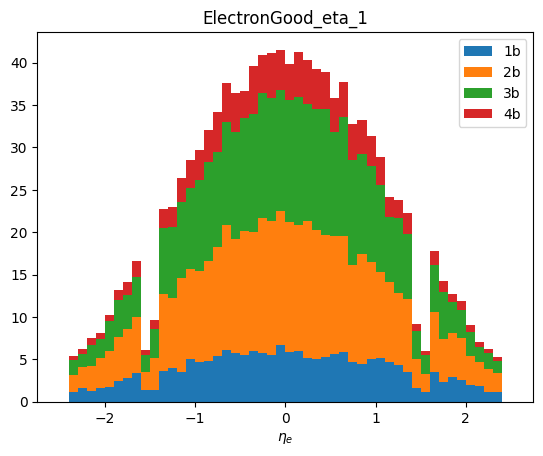

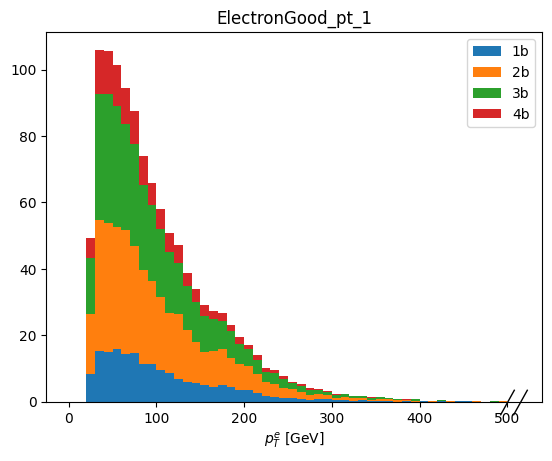

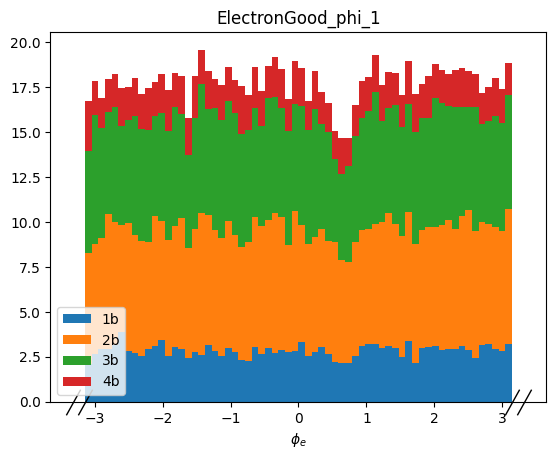

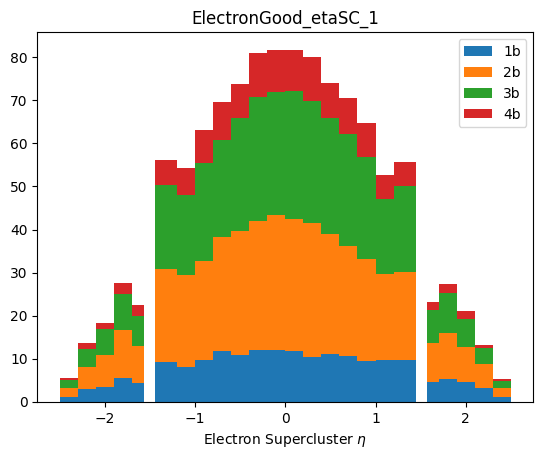

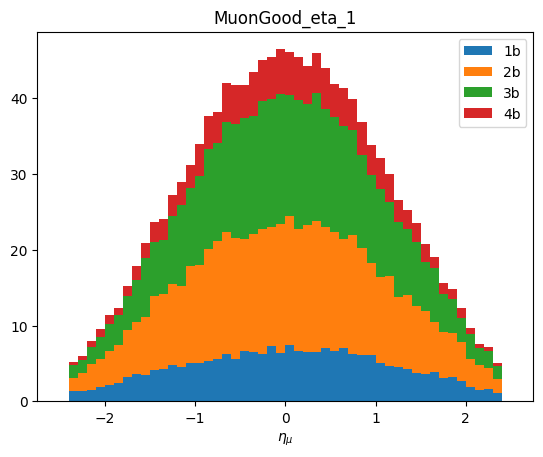

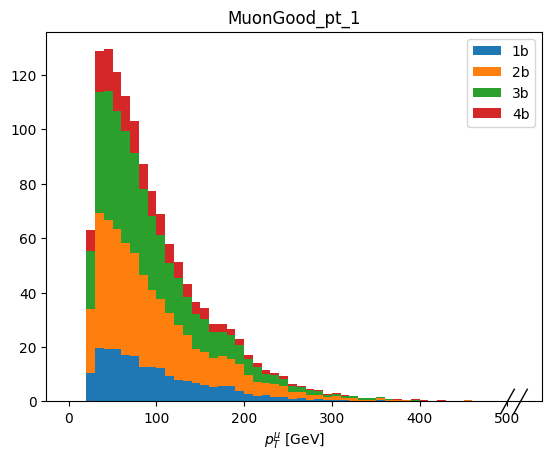

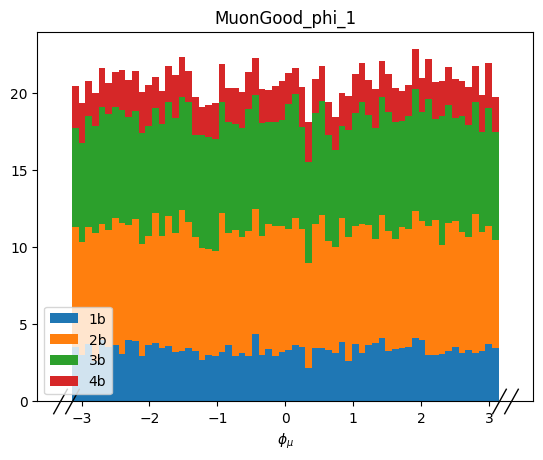

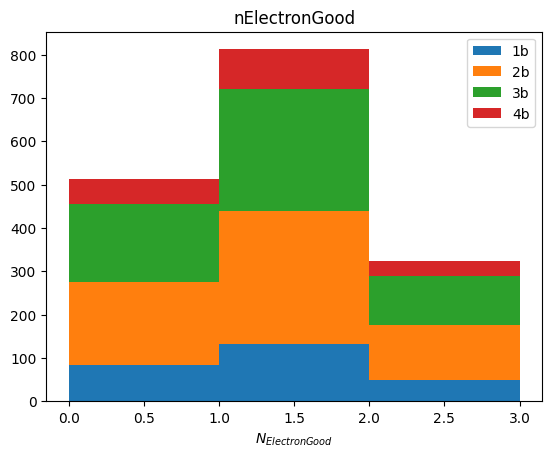

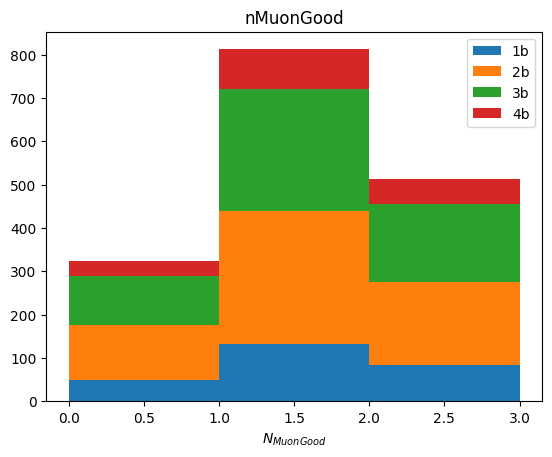

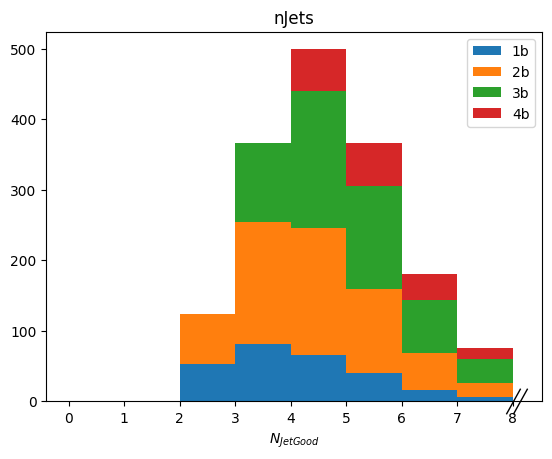

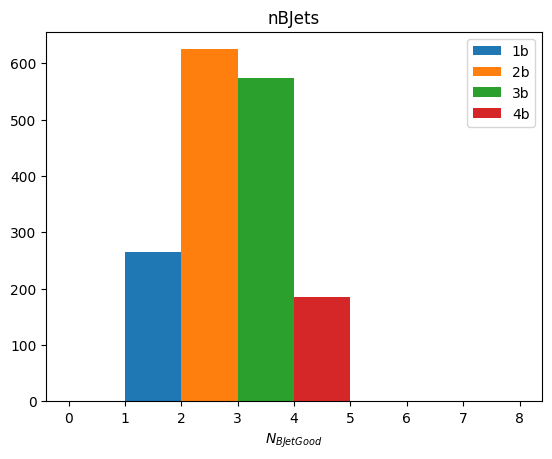

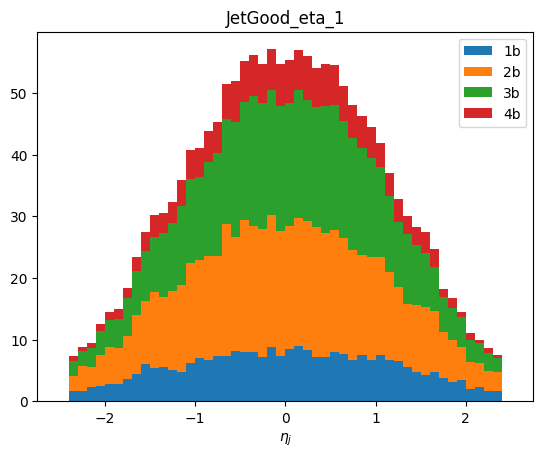

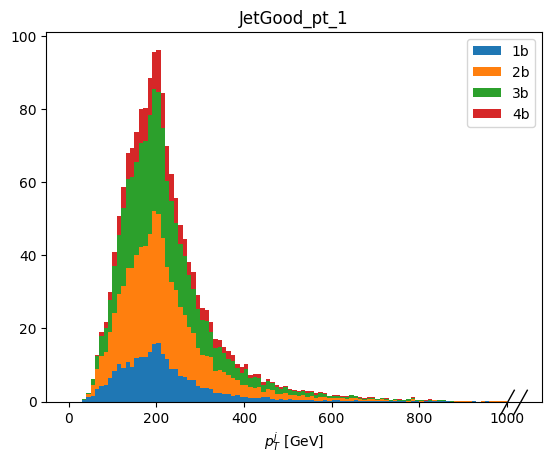

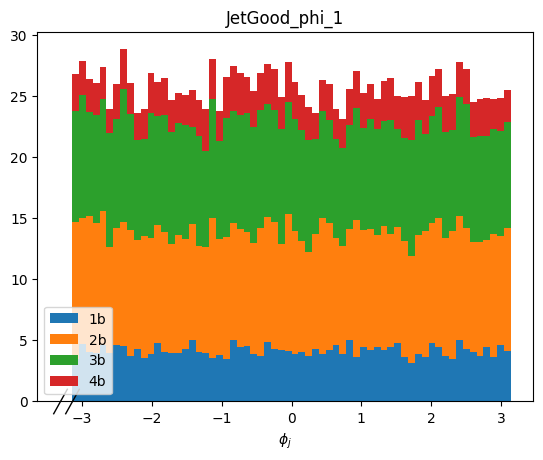

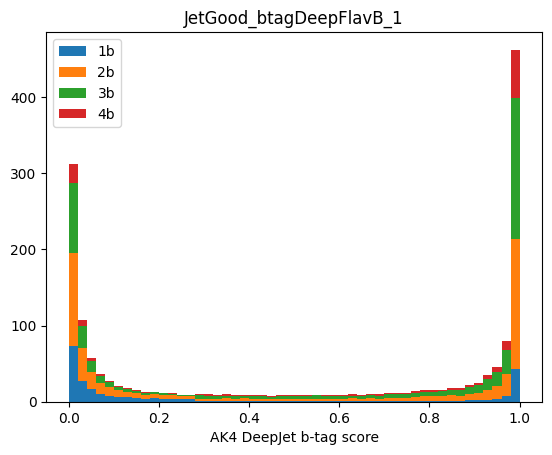

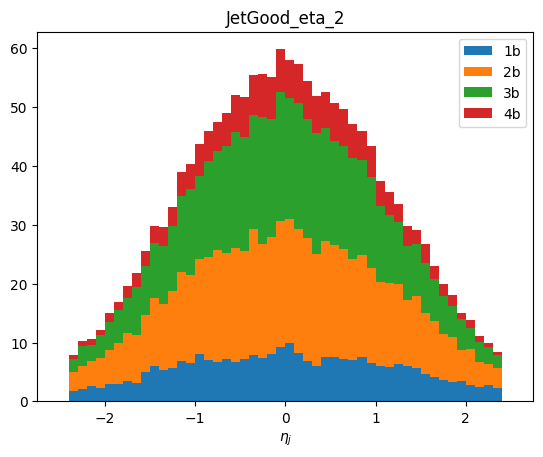

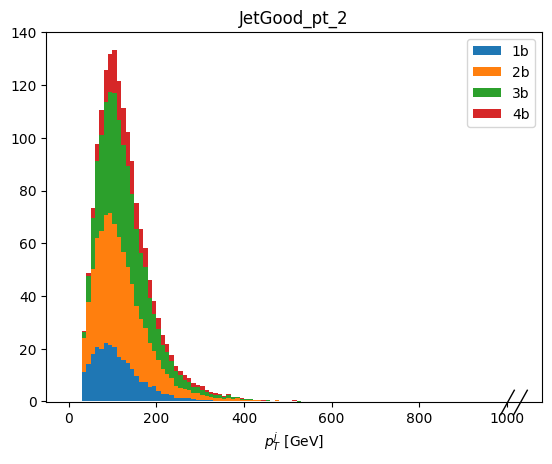

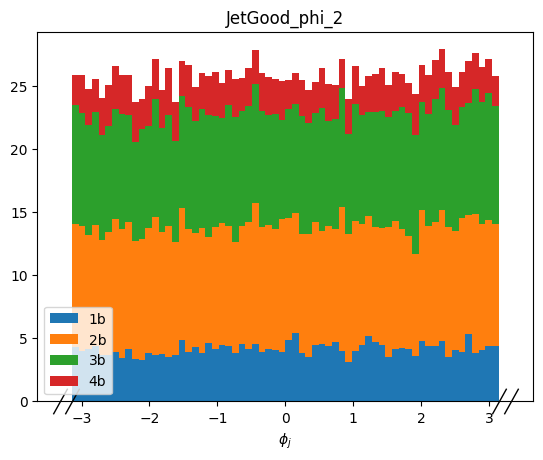

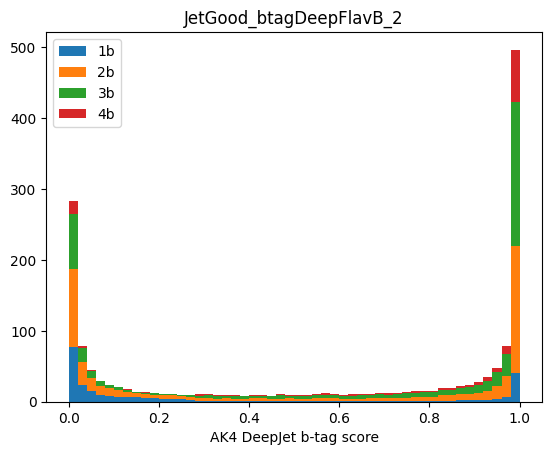

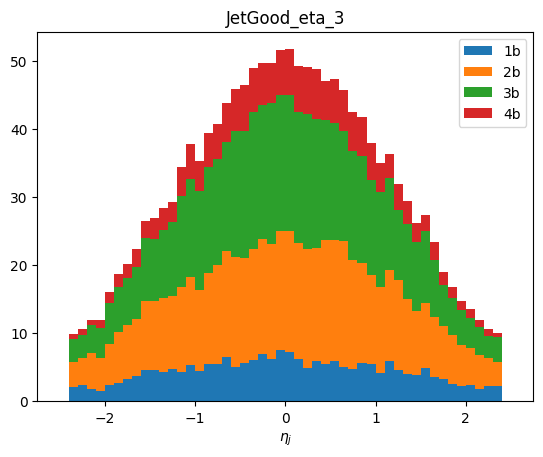

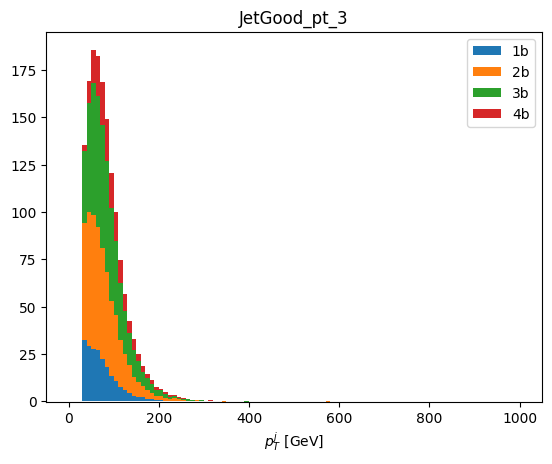

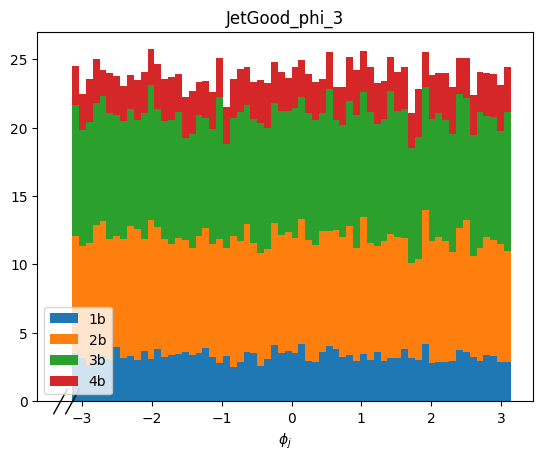

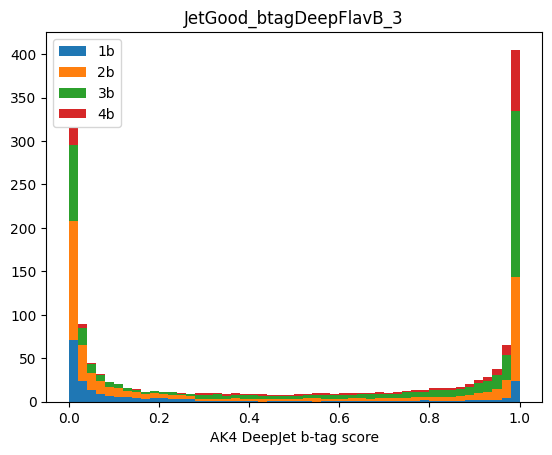

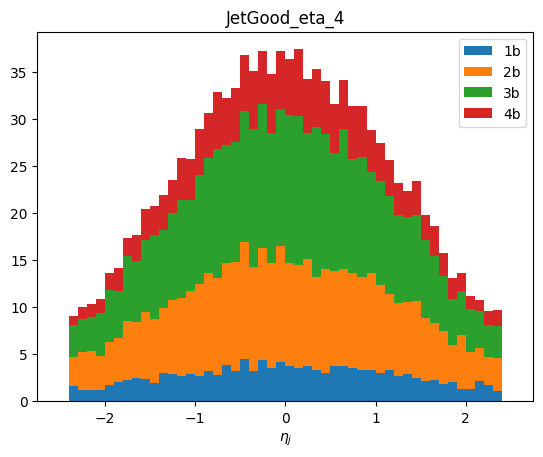

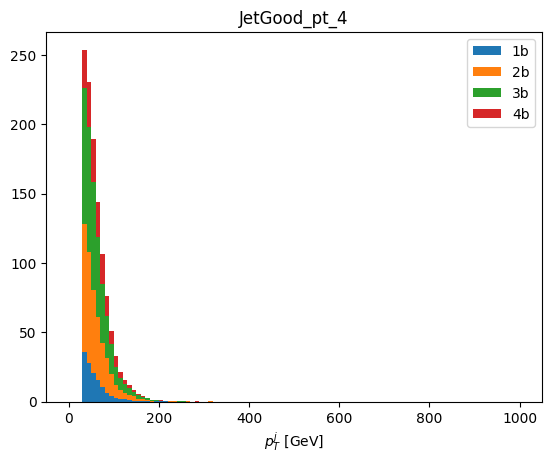

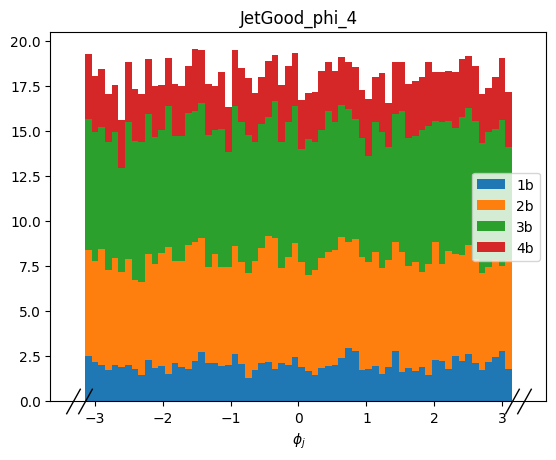

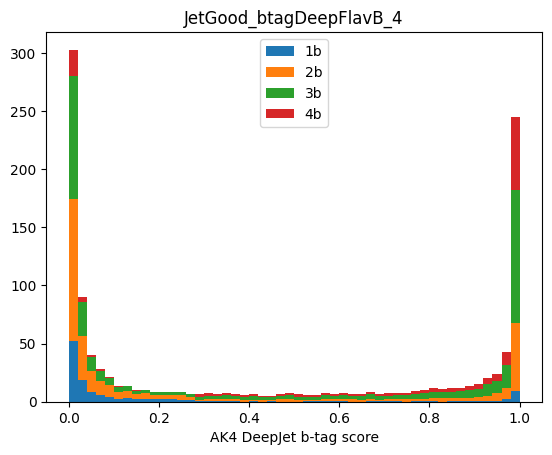

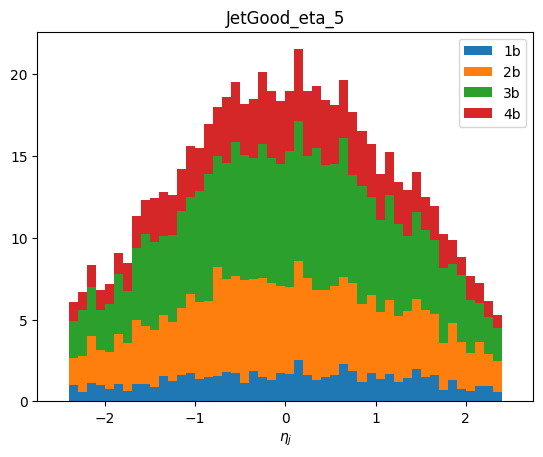

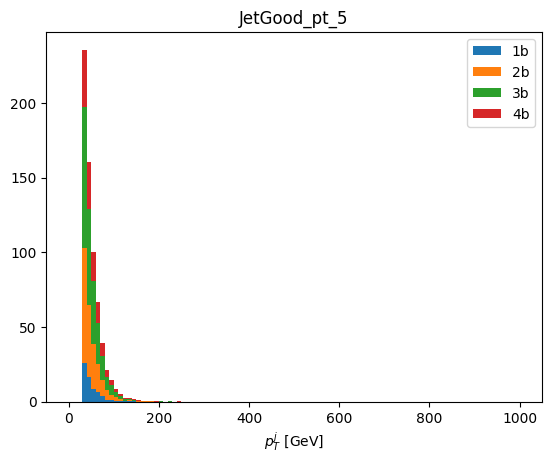

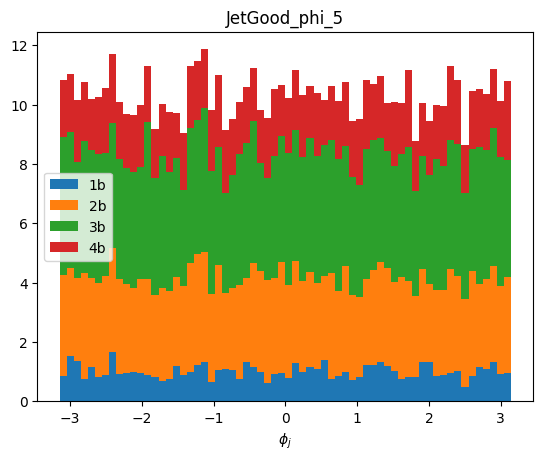

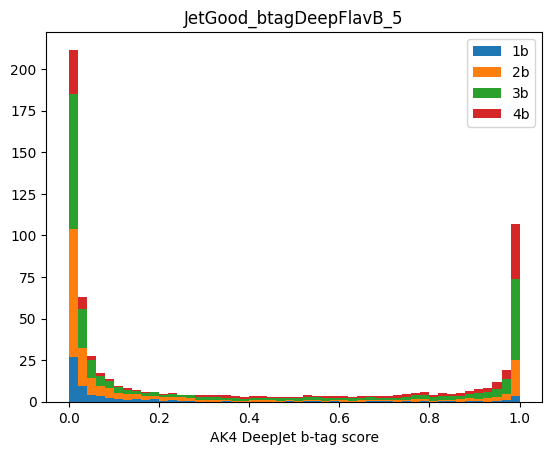

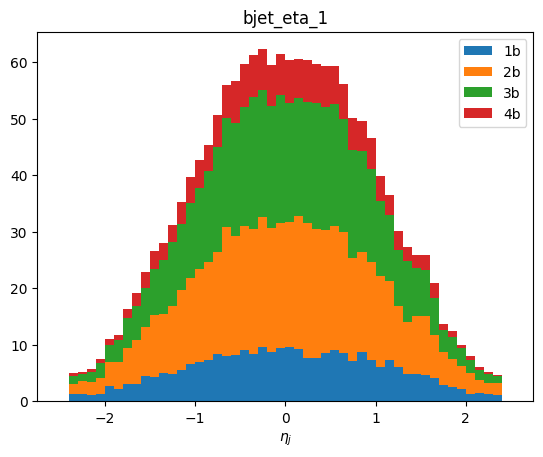

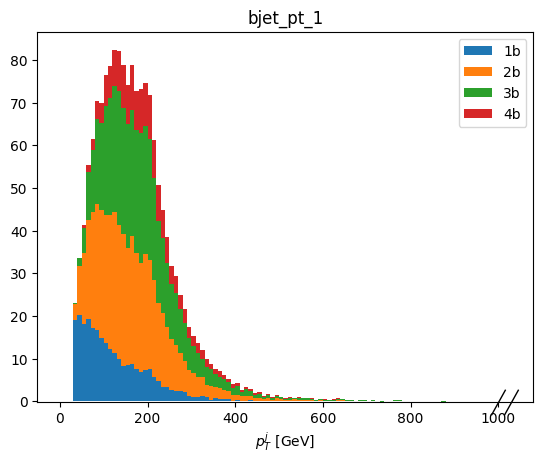

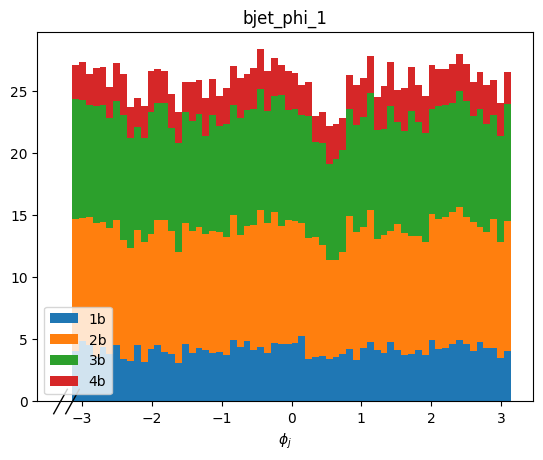

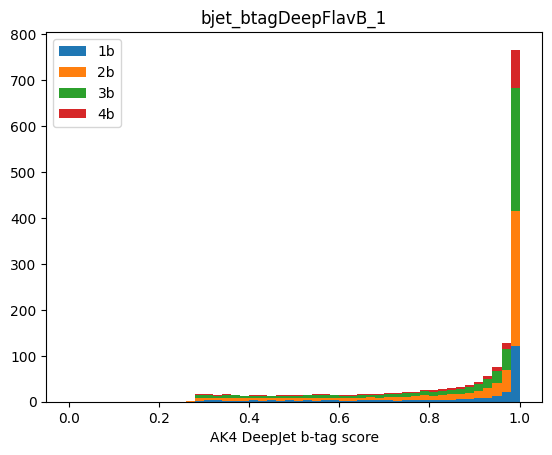

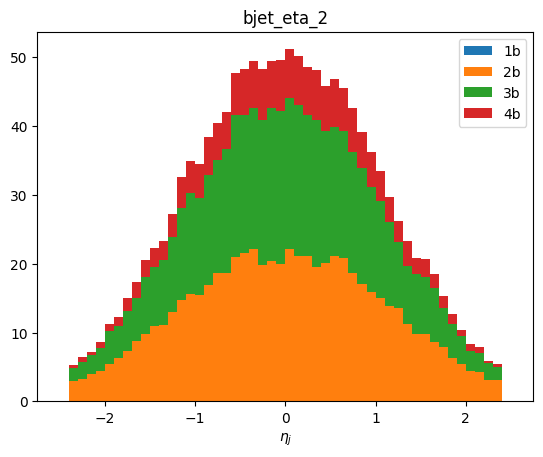

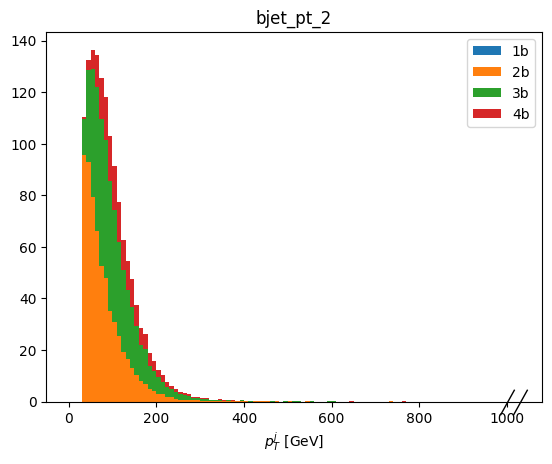

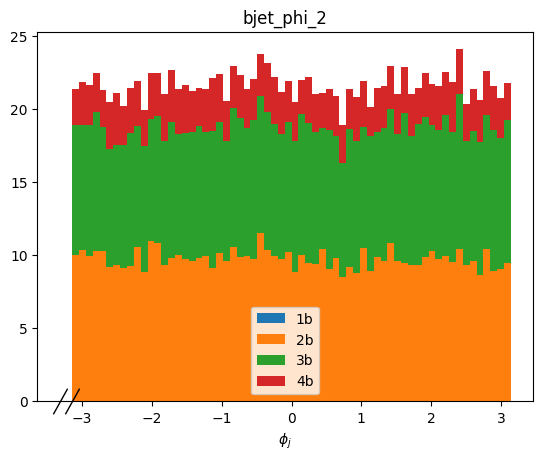

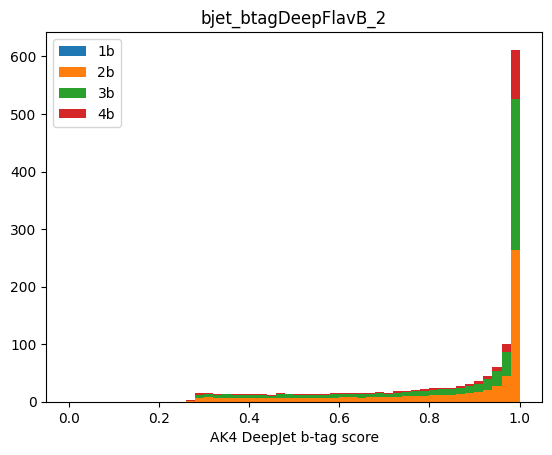

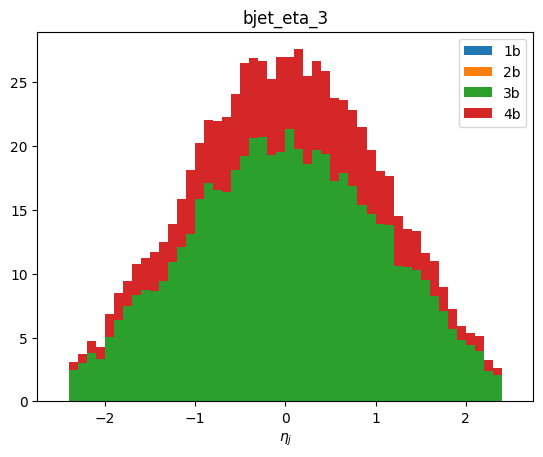

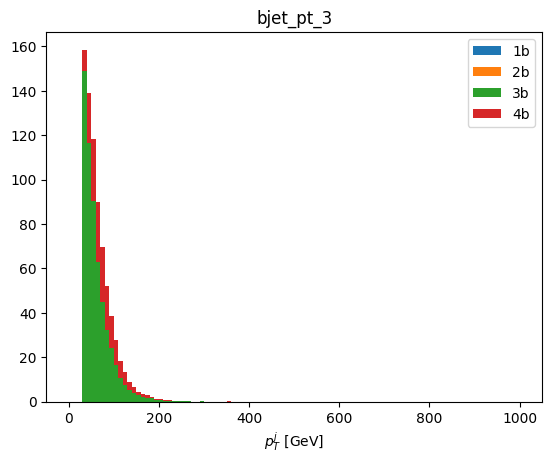

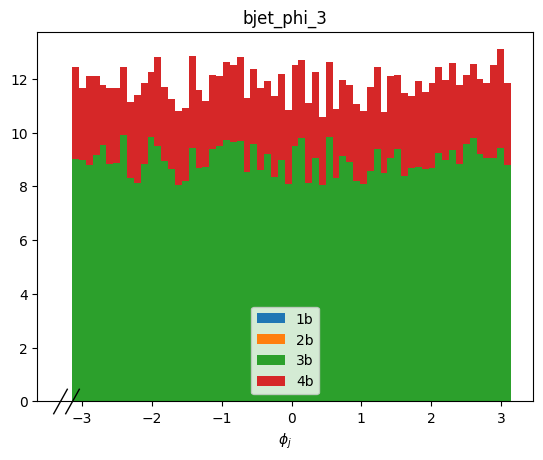

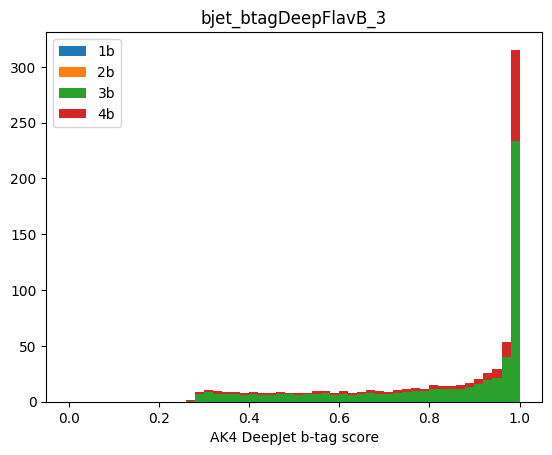

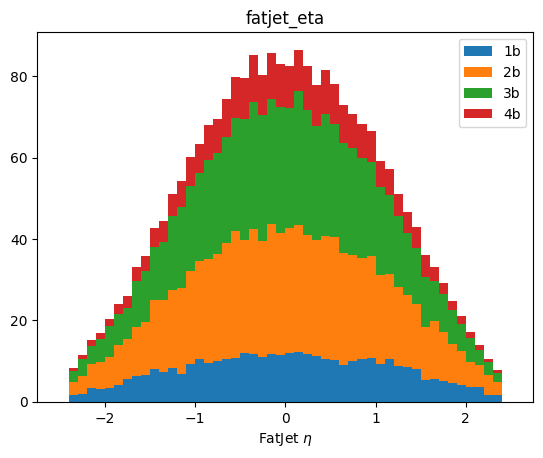

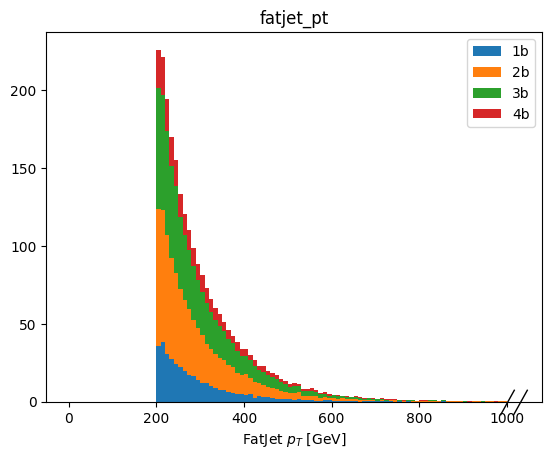

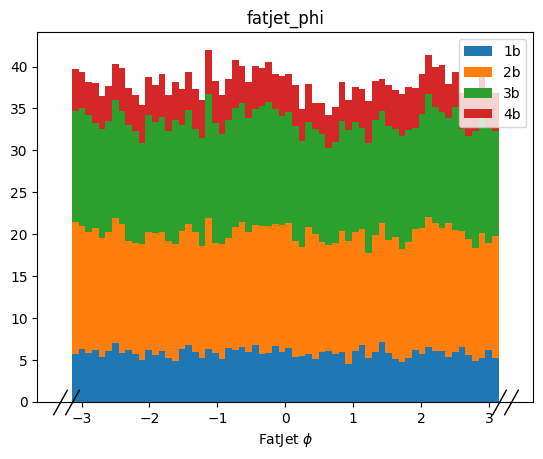

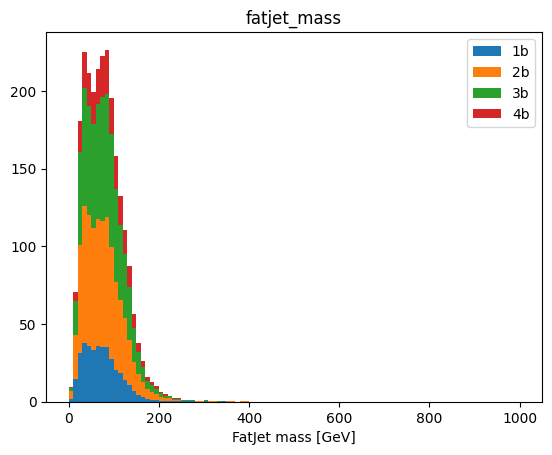

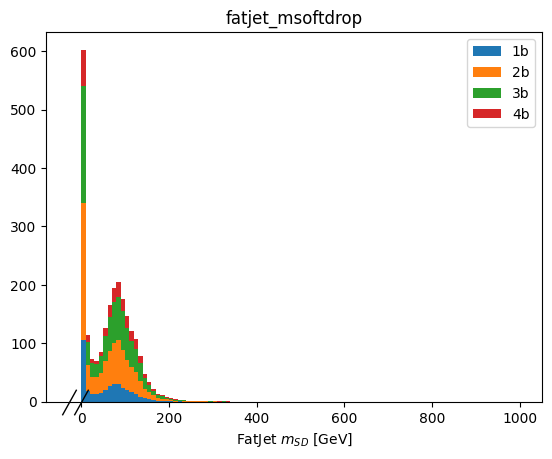

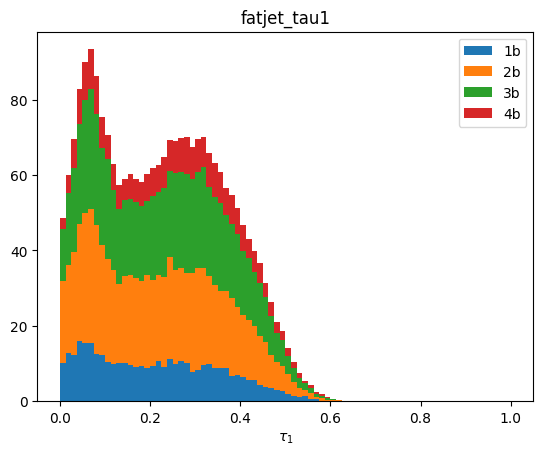

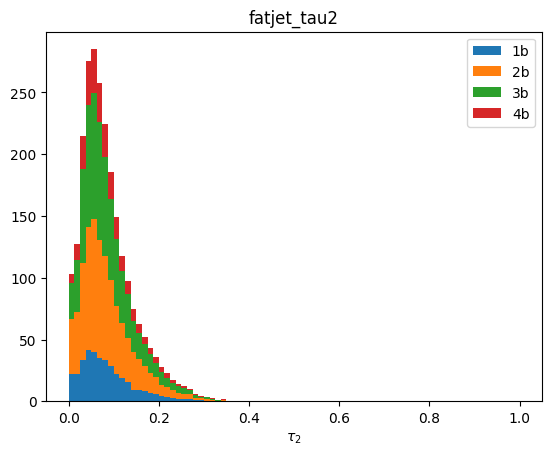

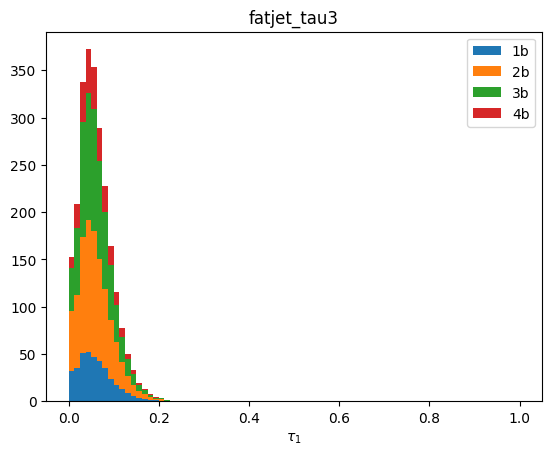

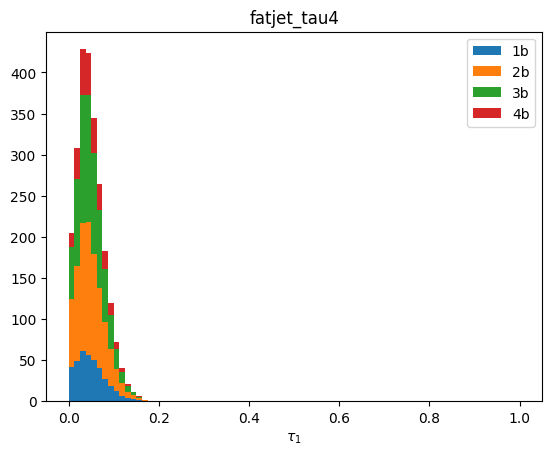

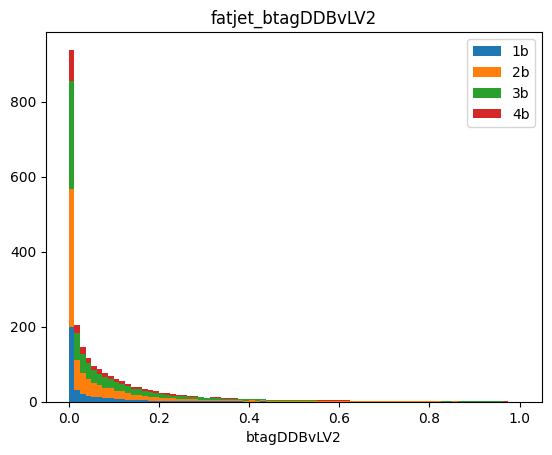

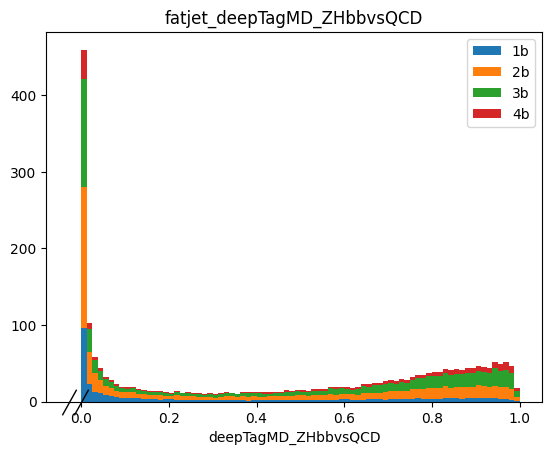

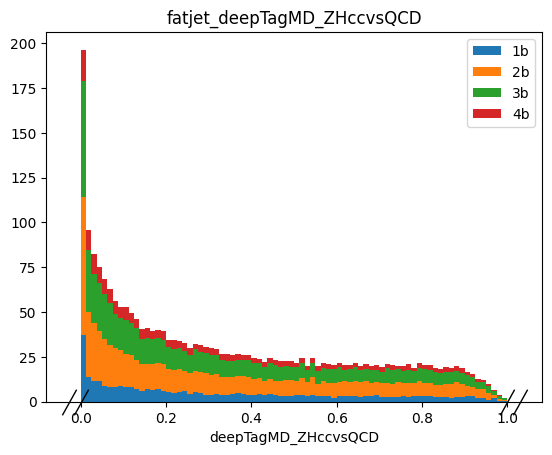

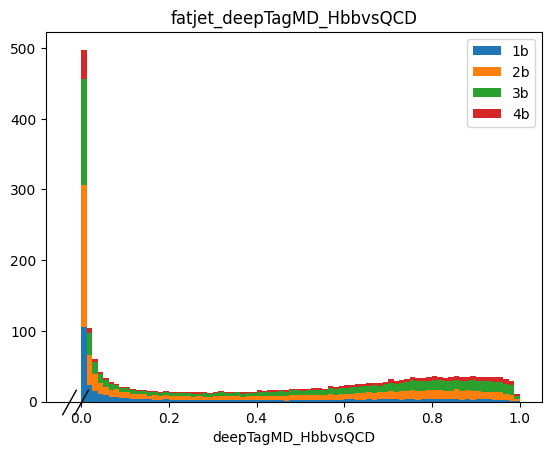

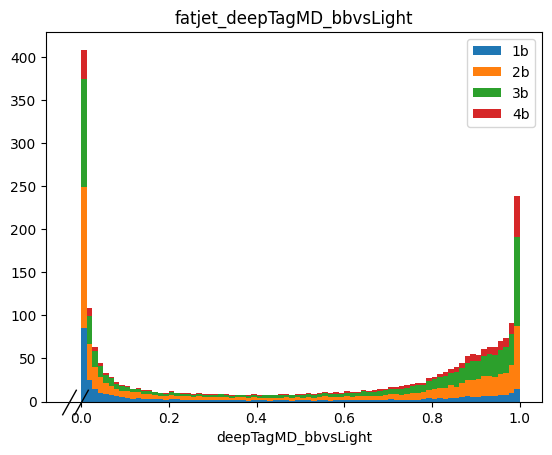

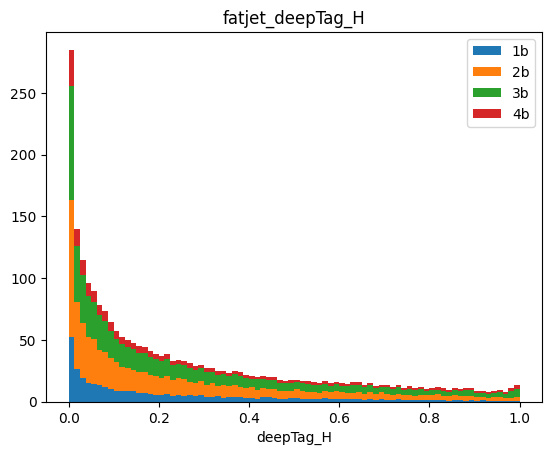

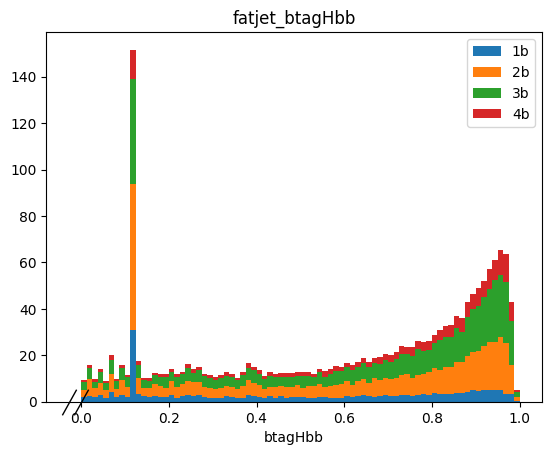

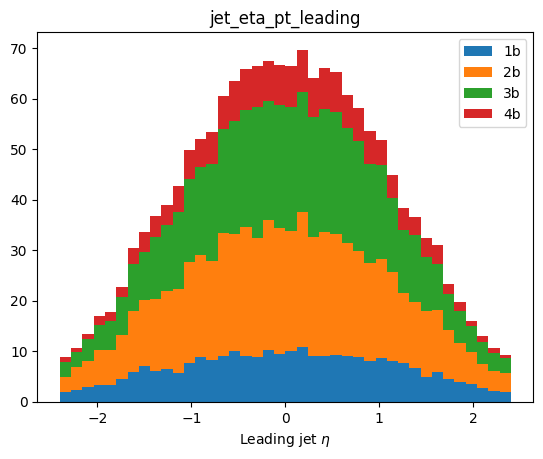

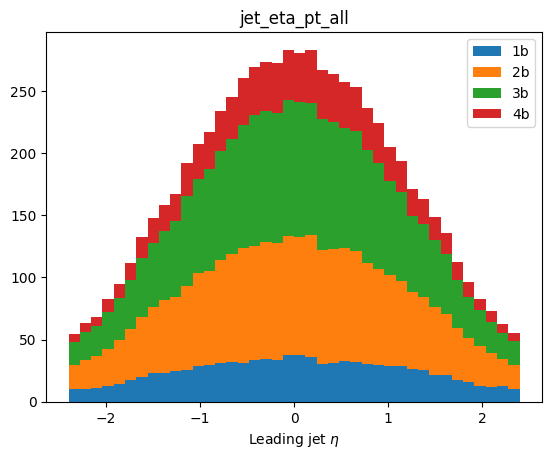

<Figure size 640x480 with 0 Axes>

In [10]:
for i, var_name in enumerate(o['variables'].keys()):
    varHist = o['variables'][var_name]['ttHTobb']['ttHTobb_2018']
    h = varHist.stack("cat").project(varHist.axes[-1].name)[:-1].plot(stack=True,density=False,histtype="fill")
    plt.legend()
    plt.title(var_name)
    plt.savefig(f"hists/plot_{i}.png")
    plt.show()
    plt.clf()

In [13]:
print(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['LeptonGood_phi'])
print(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['LeptonGood_N'])

column_accumulator(array([ 1.6933594,  0.4821167, -0.4290161, ...,  3.0253906, -1.5092773,
        2.491211 ], dtype=float32))
column_accumulator(array([2, 2, 2, ..., 2, 2, 2]))


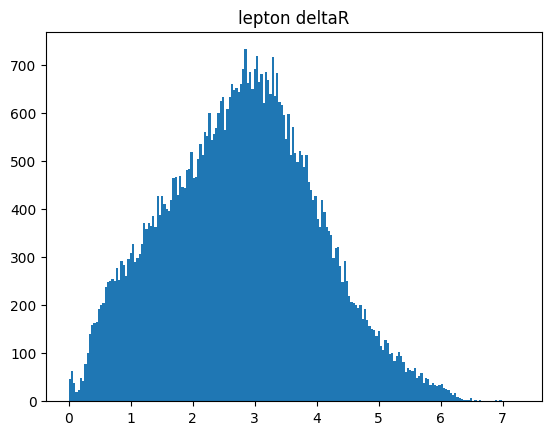

In [3]:
leptonsPhi = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['LeptonGood_phi'].value)
leptonsEta = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['LeptonGood_eta'].value)
leptonsN = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['LeptonGood_N'].value)
leptonsPhi = ak.unflatten(leptonsPhi,leptonsN)
leptonsPhi = ak.to_list(ak.combinations(leptonsPhi,2))
leptonsEta = ak.unflatten(leptonsEta,leptonsN)
leptonsEta = ak.to_list(ak.combinations(leptonsEta,2))

def deltaR(phis,etas):
    leftPhi,rightPhi = ak.unzip(phis)
    leftEta,rightEta = ak.unzip(etas)
    return np.sqrt(pow(leftEta-rightEta,2)+pow(leftPhi-rightPhi,2))

plt.hist(deltaR(leptonsPhi,leptonsEta),bins=200)
plt.title("lepton deltaR")
plt.show()

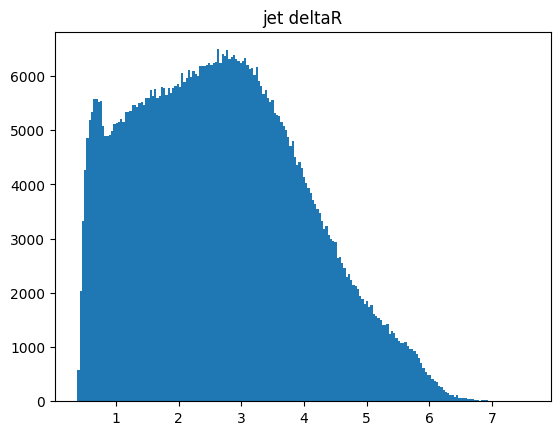

In [49]:
jetsPhi = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_phi'].value)
jetsEta = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_eta'].value)
jetsN = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_N'].value)
jetsPhi = ak.unflatten(jetsPhi,jetsN)
jetsPhi = ak.to_list(ak.combinations(jetsPhi,2))
jetsEta = ak.unflatten(jetsEta,jetsN)
jetsEta = ak.to_list(ak.combinations(jetsEta,2))

plt.hist(ak.flatten(deltaR(jetsPhi,jetsEta)),bins=200)
plt.title("jet deltaR")
plt.show()

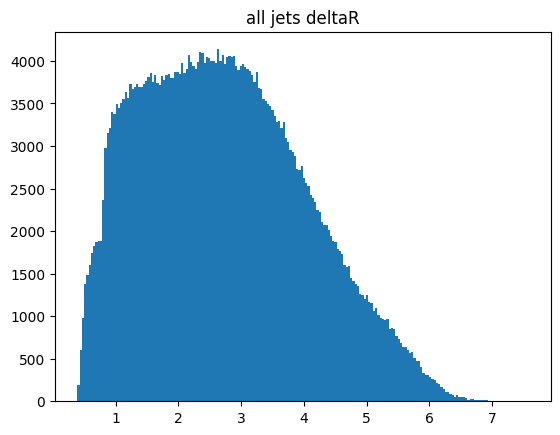

In [4]:
fatJetsPhi = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['FatJetGood_phi'].value)
fatJetsEta = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['FatJetGood_eta'].value)
fatJetsN = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['FatJetGood_N'].value)
jetsPhi = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_phi'].value)
jetsEta = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_eta'].value)
jetsN = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_N'].value)
jetsPhi = ak.unflatten(jetsPhi,jetsN)
jetsEta = ak.unflatten(jetsEta,jetsN)
fatJetsPhi = ak.unflatten(fatJetsPhi,fatJetsN)
fatJetsEta = ak.unflatten(fatJetsEta,fatJetsN)
allJetsPhi = ak.concatenate([jetsPhi,fatJetsPhi],axis=1)
allJetsEta = ak.concatenate([jetsEta,fatJetsEta],axis=1)
allJetsPhi = ak.to_list(ak.combinations(allJetsPhi,2))
allJetsEta = ak.to_list(ak.combinations(allJetsEta,2))

plt.hist(ak.flatten(deltaR(allJetsPhi,allJetsEta)),bins=200)
plt.title("all jets deltaR")
plt.show()

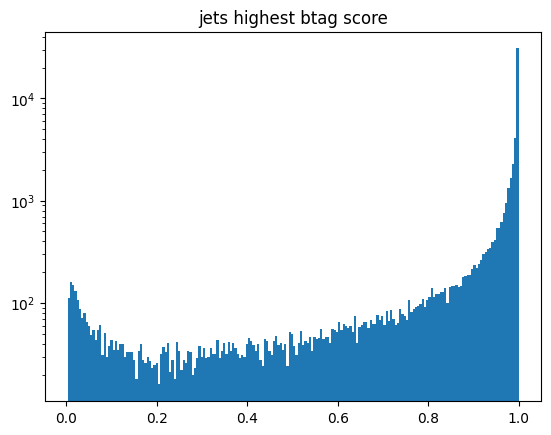

In [12]:
jetsBScore = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_btagDeepFlavB'].value)
jetsN = ak.from_numpy(o['columns']['ttHTobb']['ttHTobb_2018']['baseline']['JetGood_N'].value)
jetsBScore = ak.unflatten(jetsBScore,jetsN)
maxBScore = ak.max(jetsBScore,axis=1)
plt.hist(maxBScore,bins=200)
plt.title("jets highest btag score")
plt.semilogy()
plt.show()

dict_keys(['TTbbDiLeptonic_Powheg_2018'])


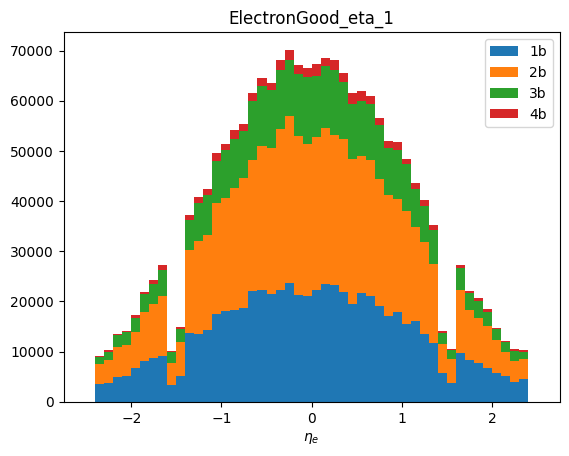

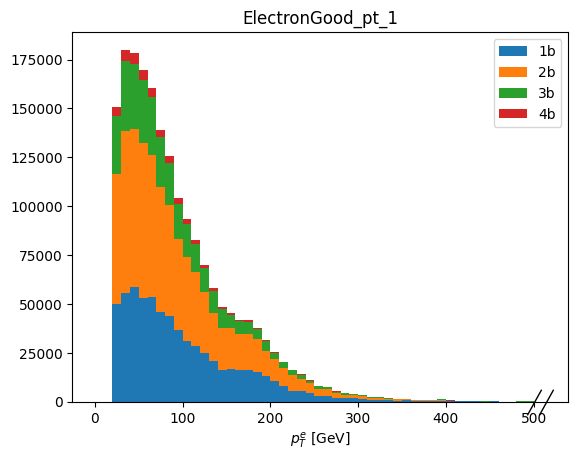

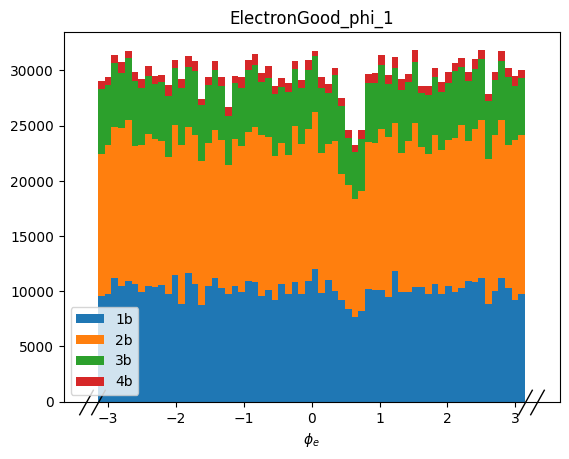

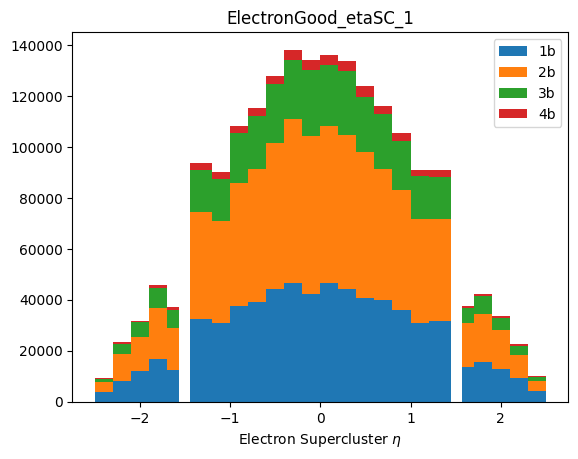

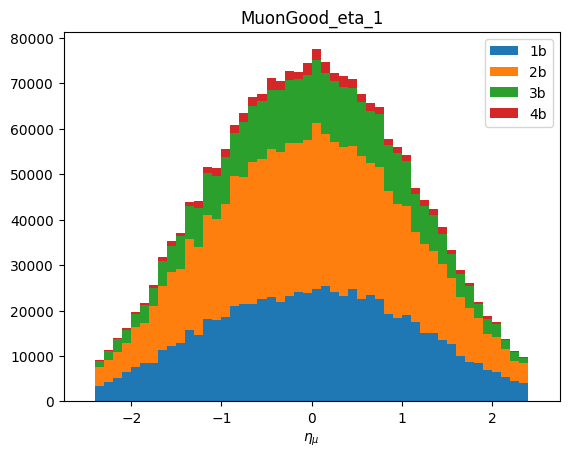

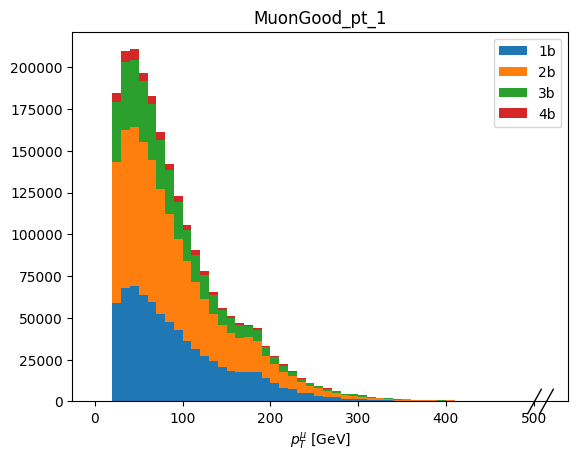

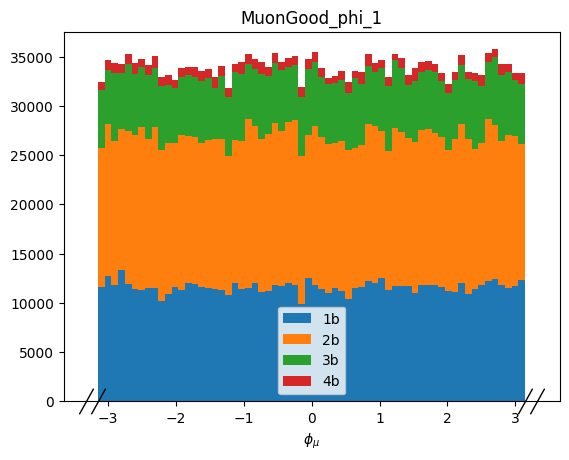

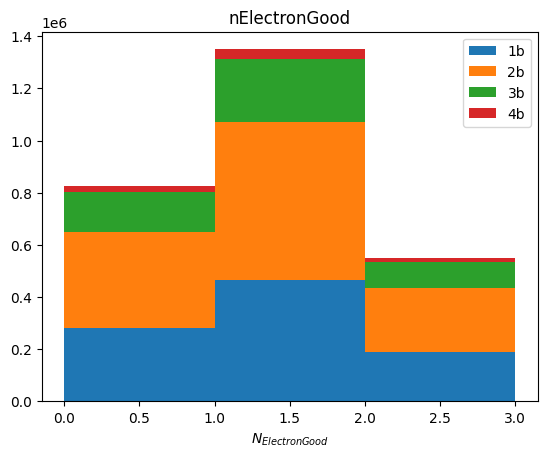

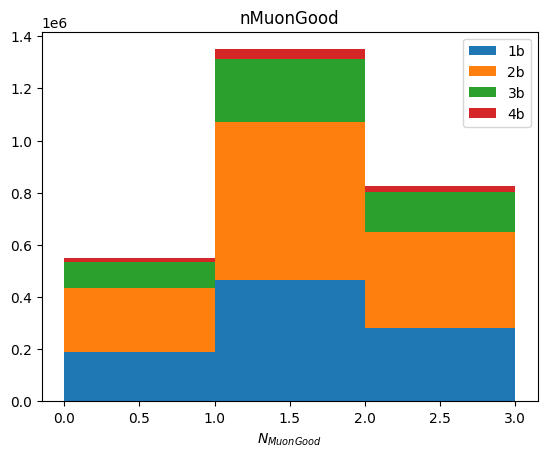

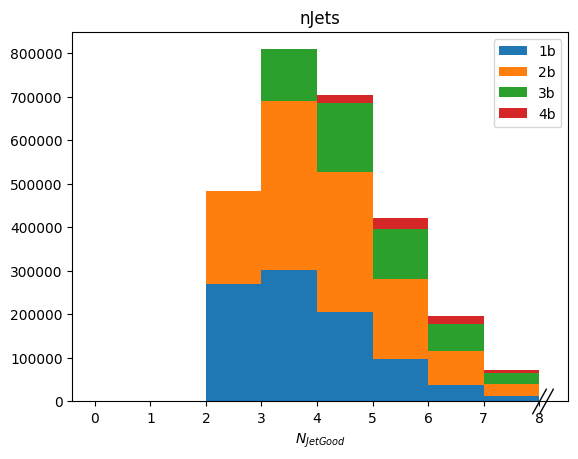

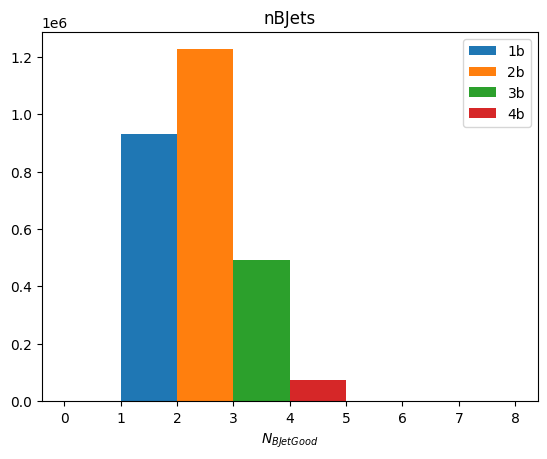

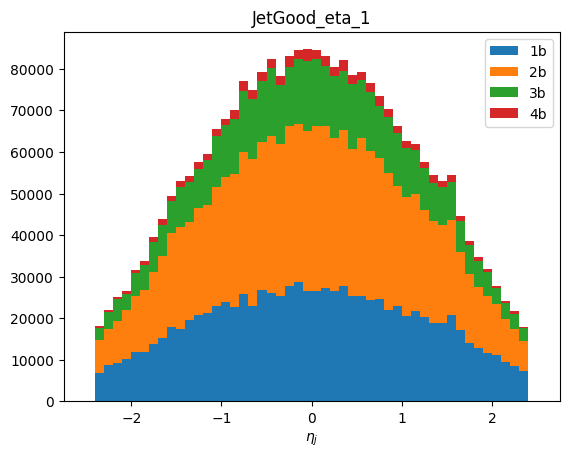

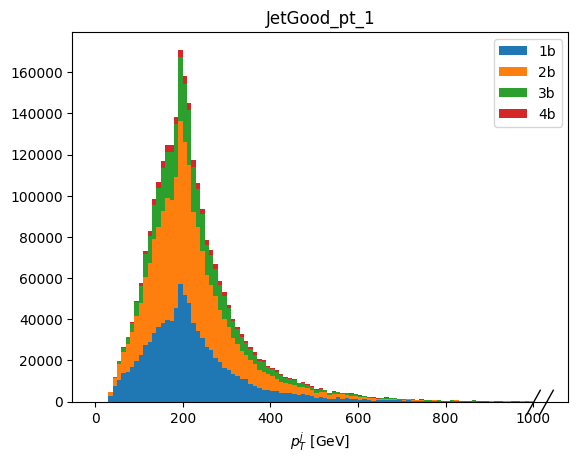

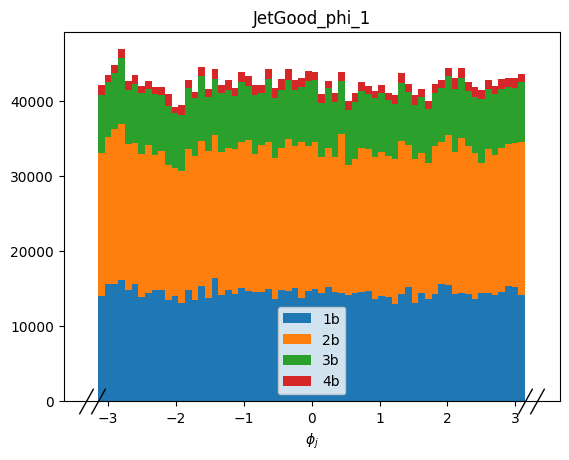

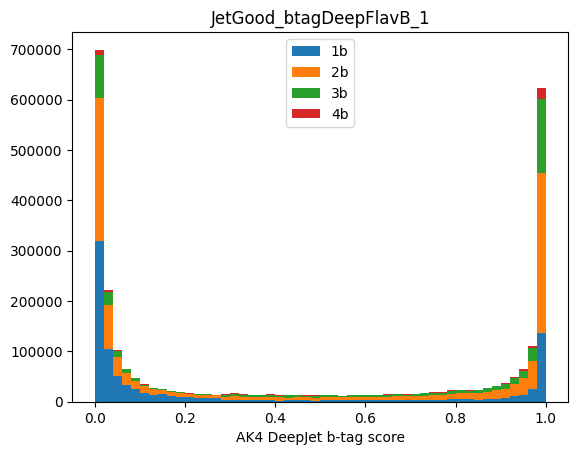

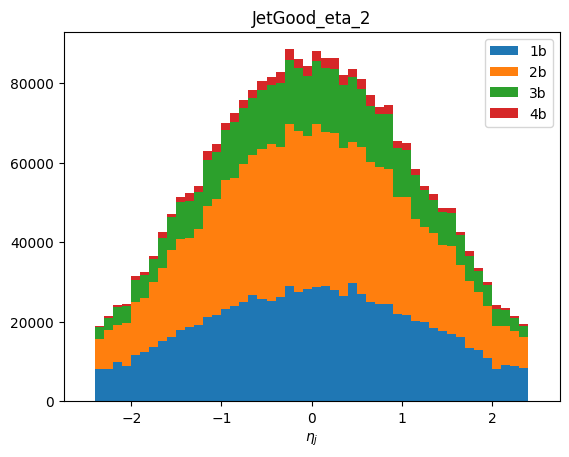

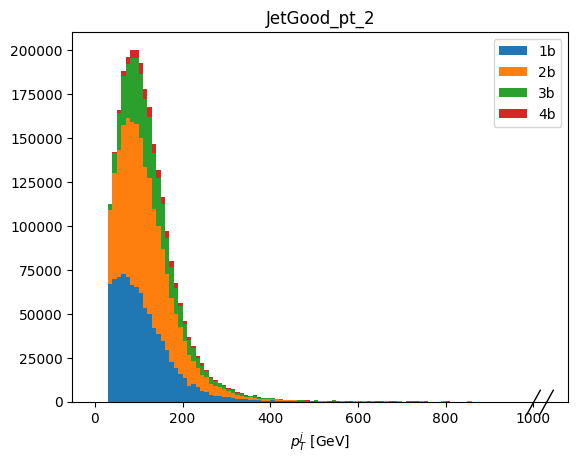

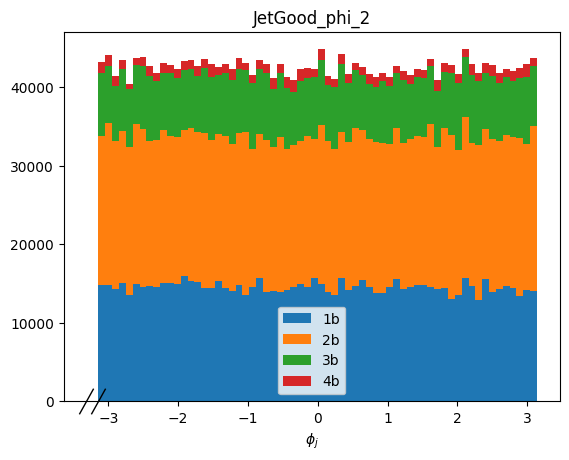

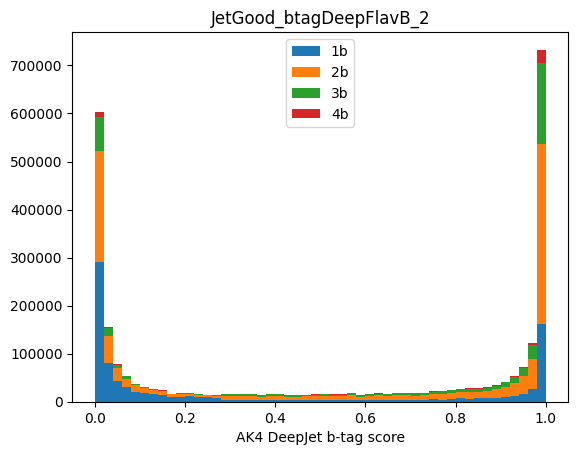

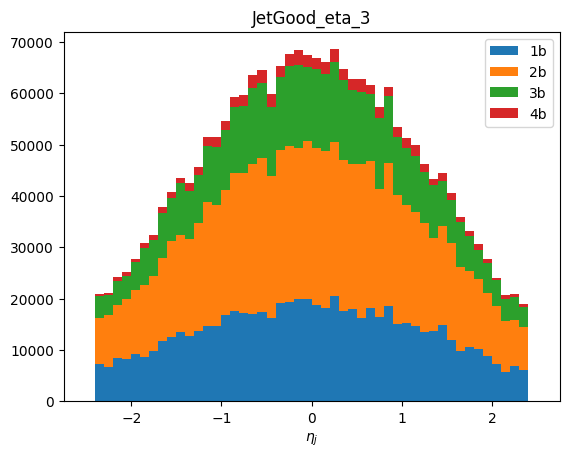

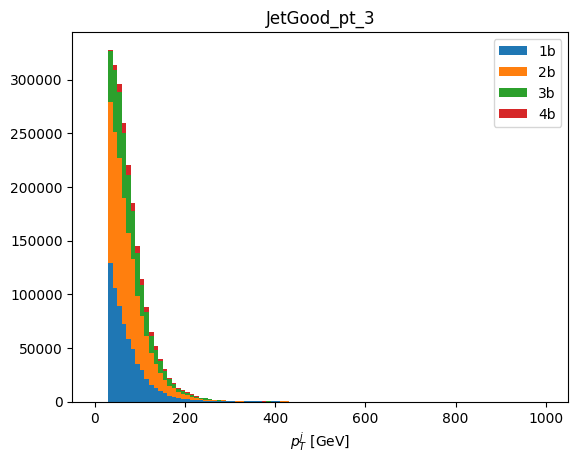

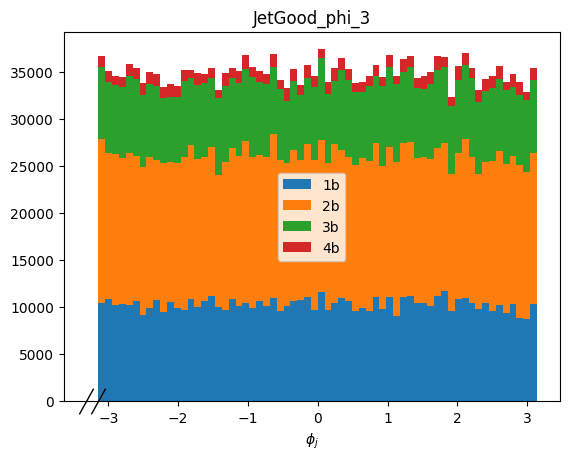

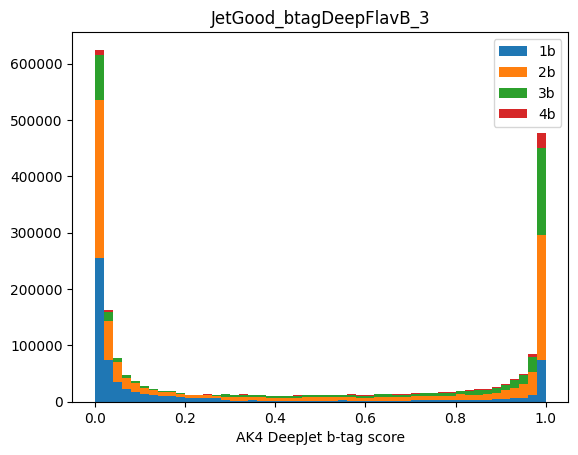

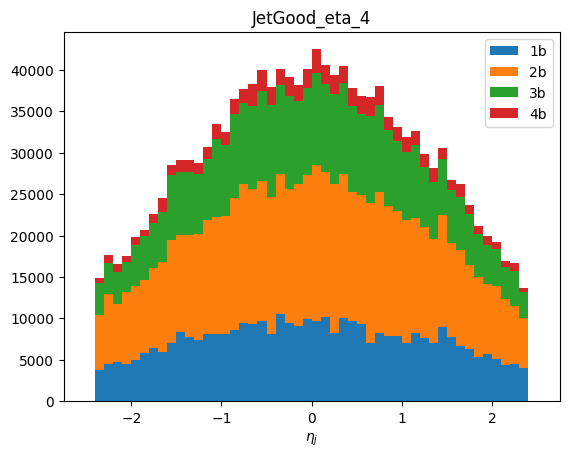

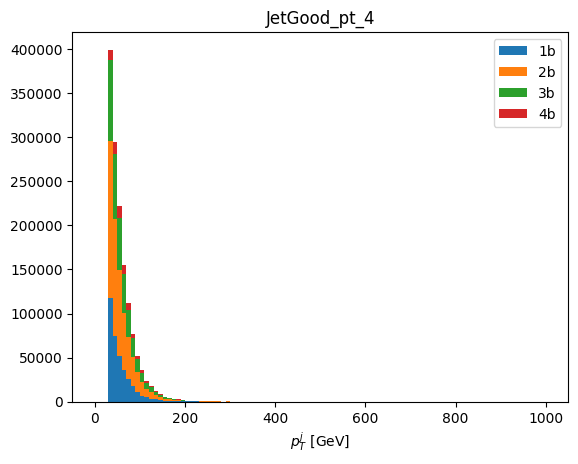

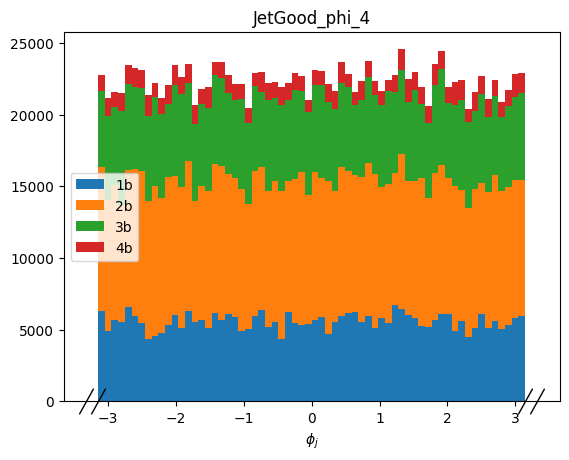

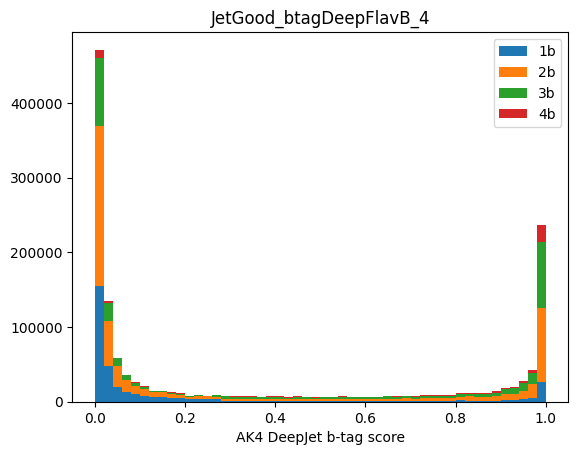

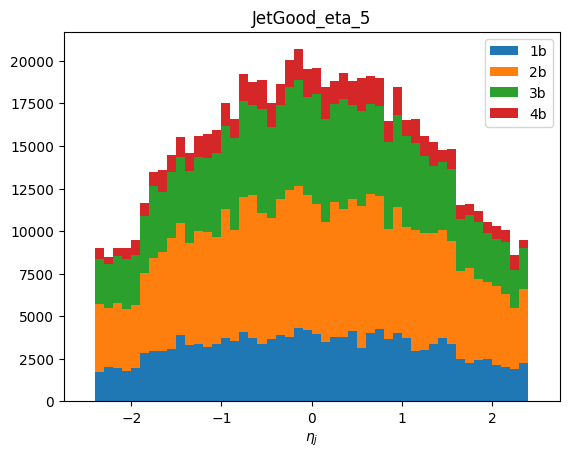

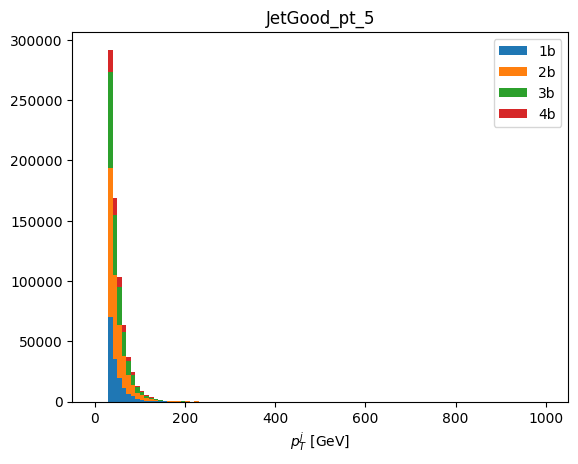

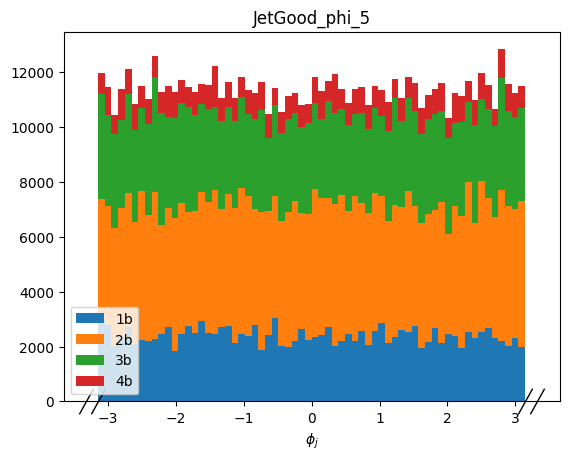

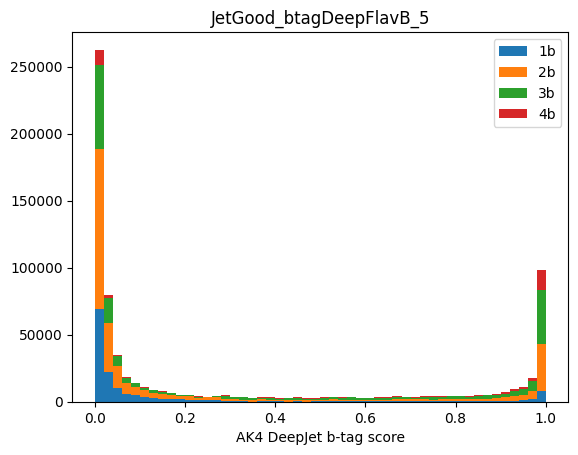

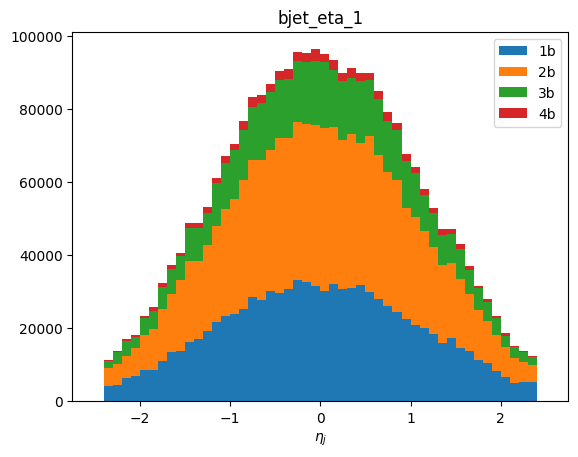

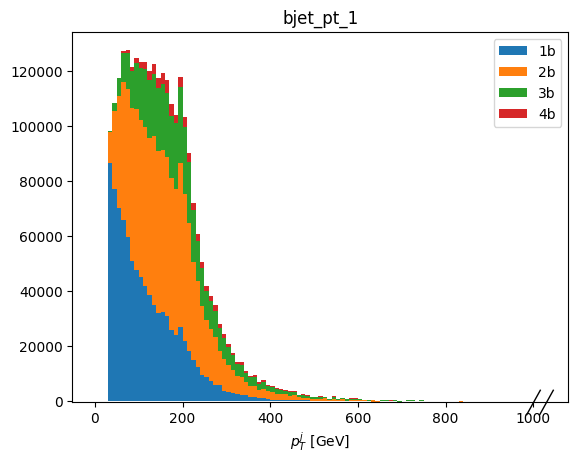

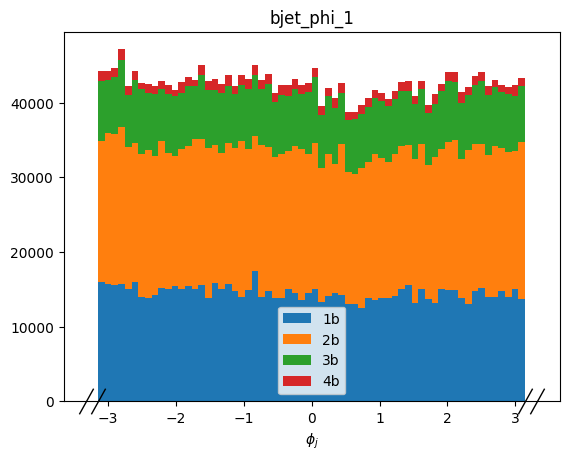

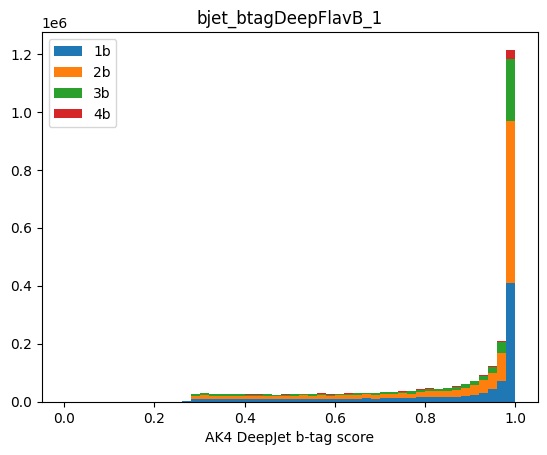

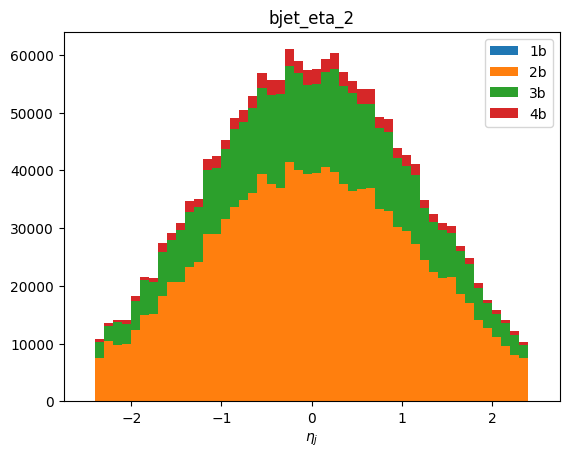

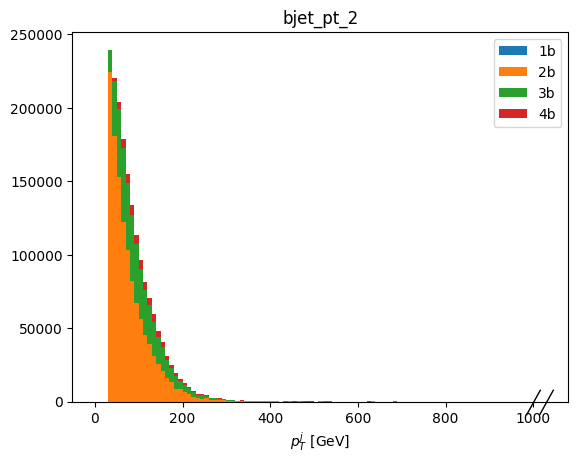

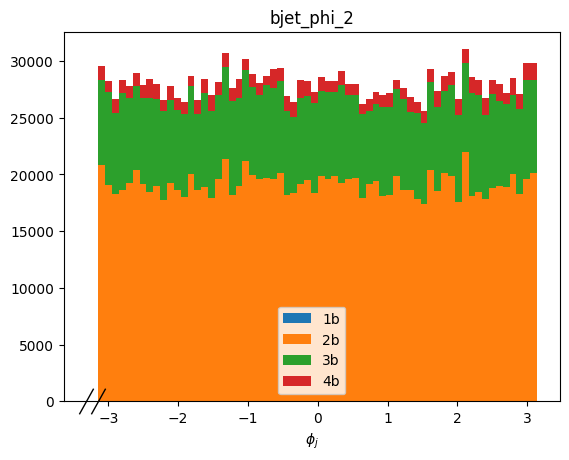

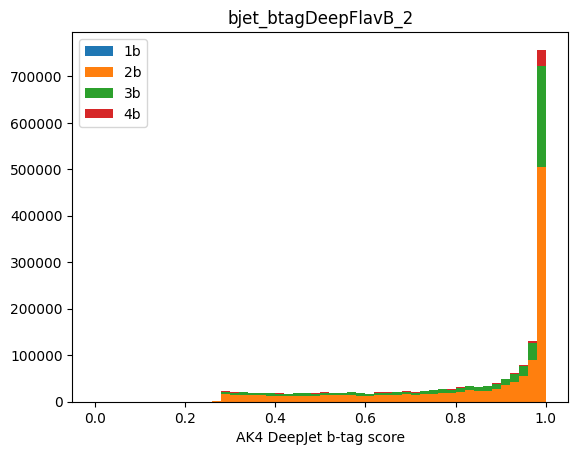

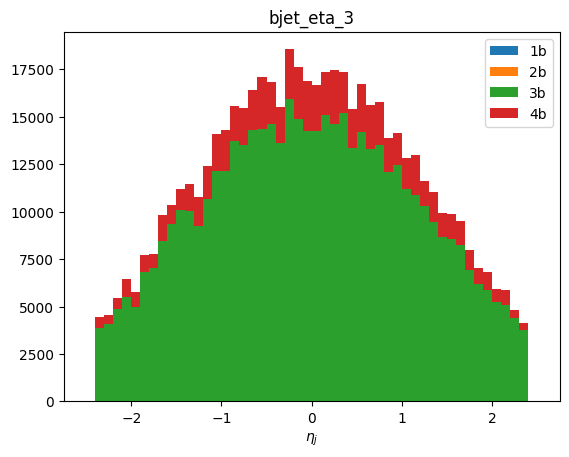

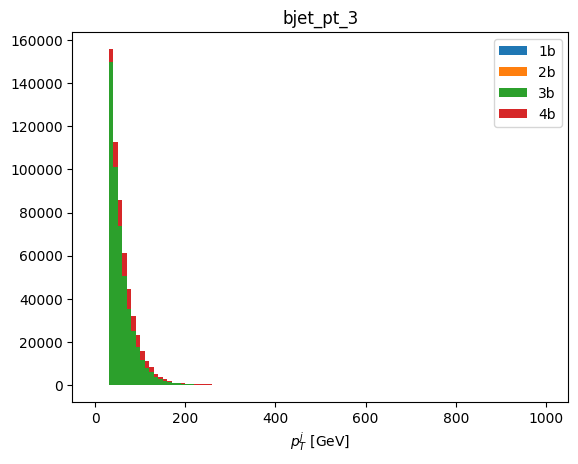

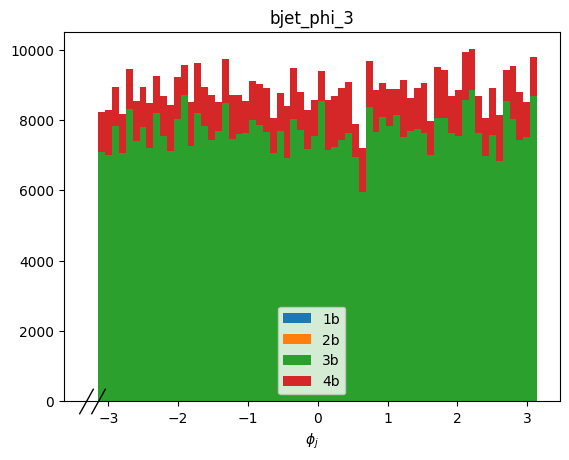

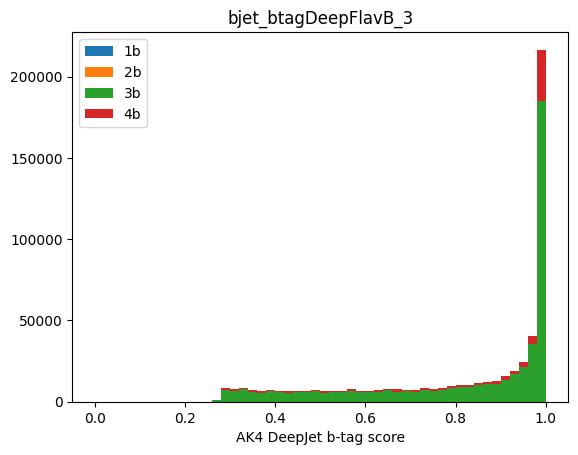

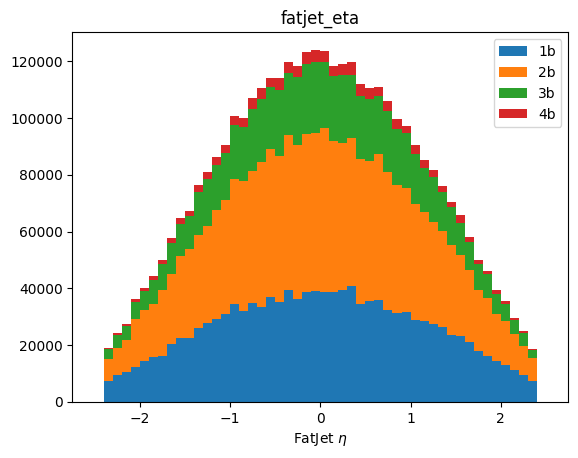

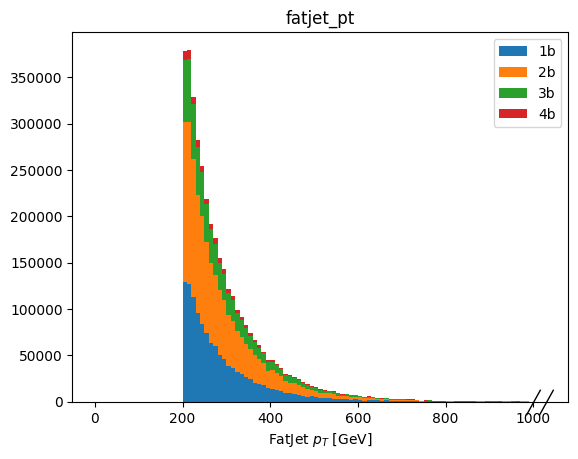

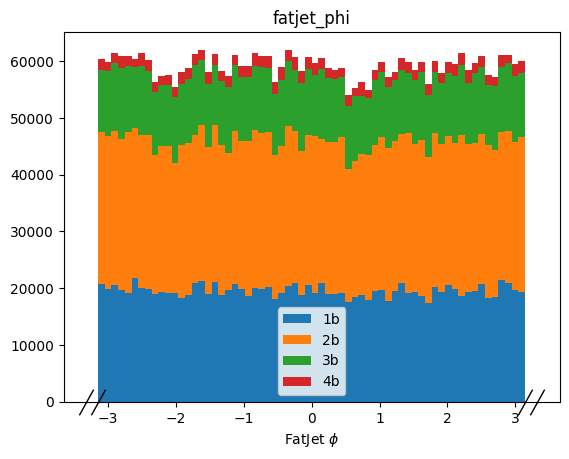

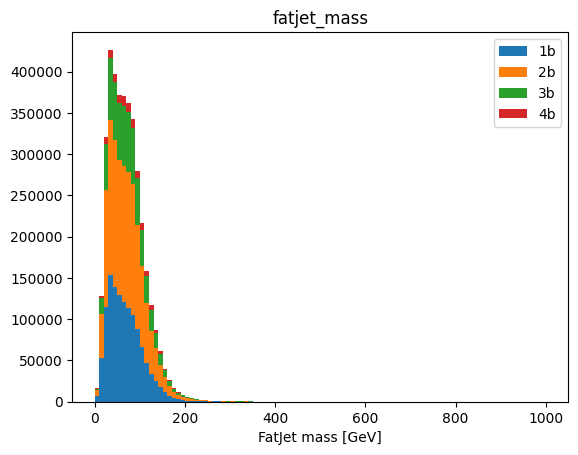

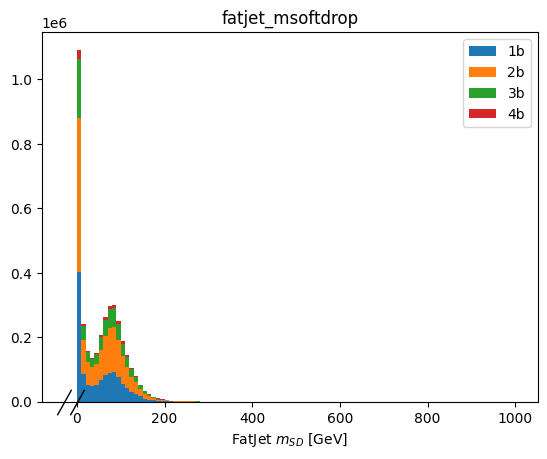

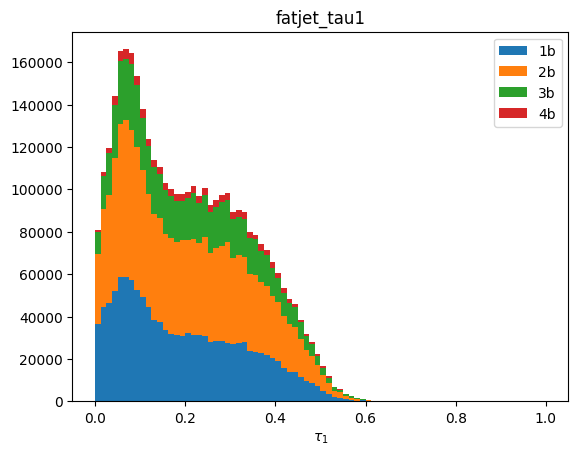

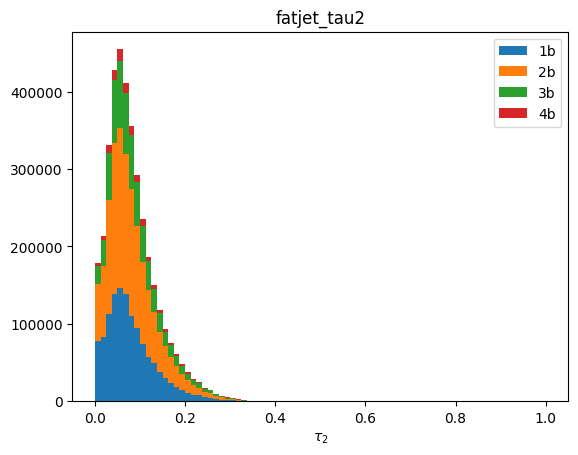

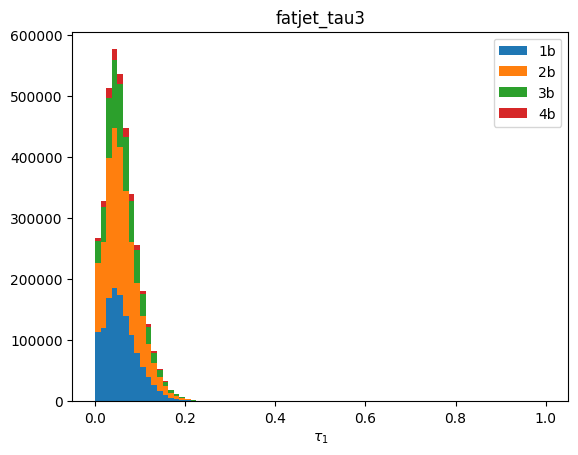

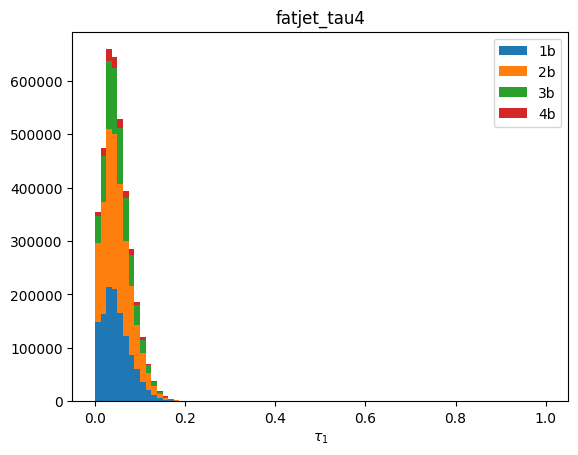

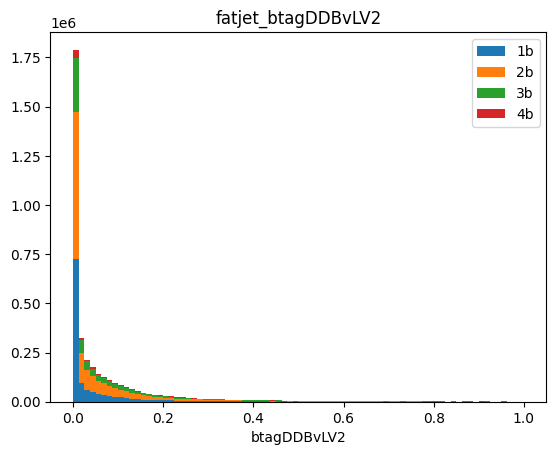

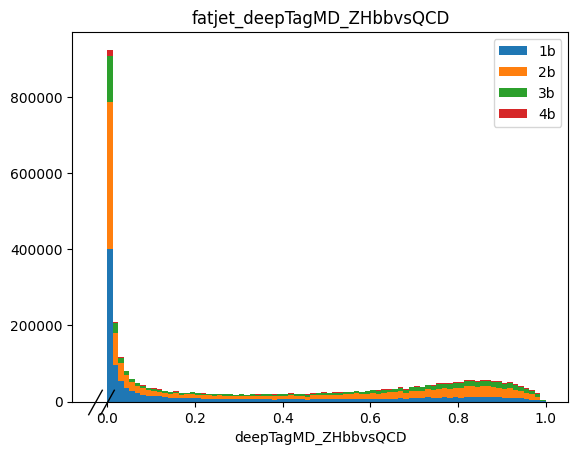

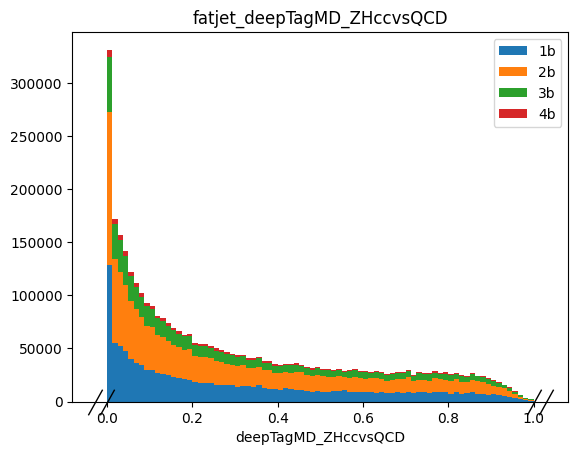

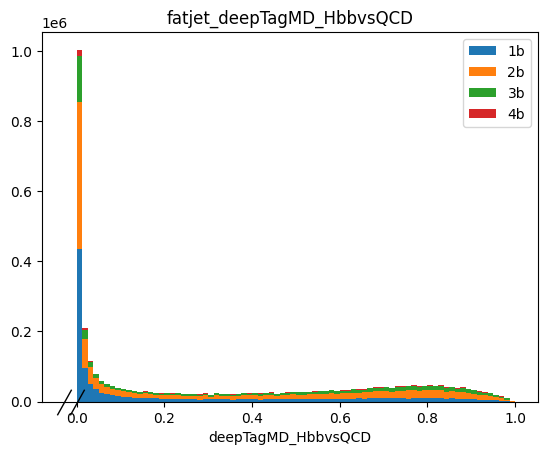

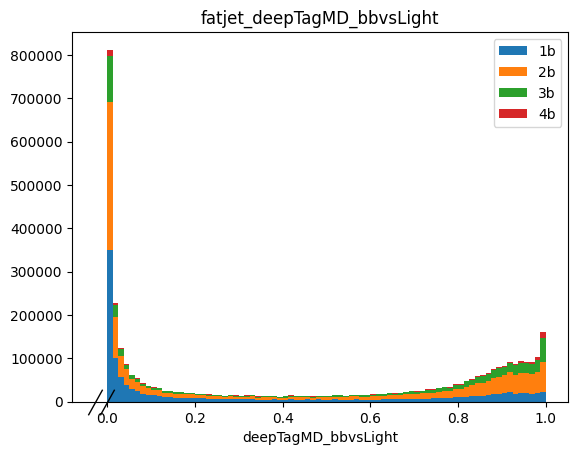

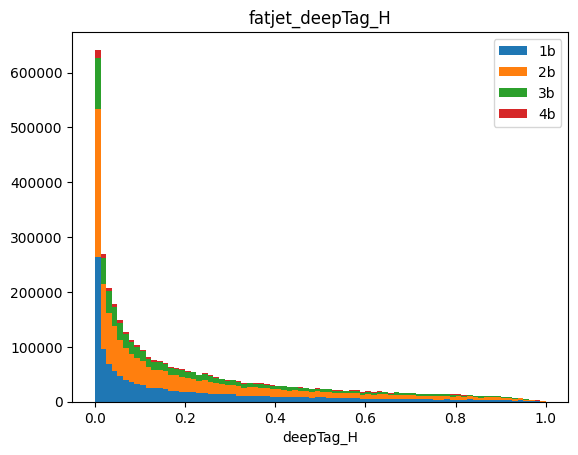

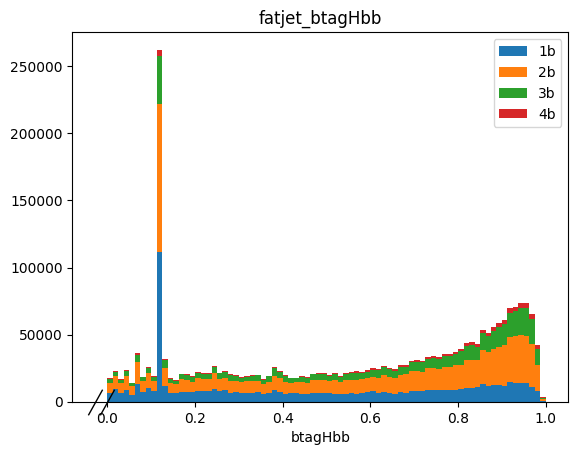

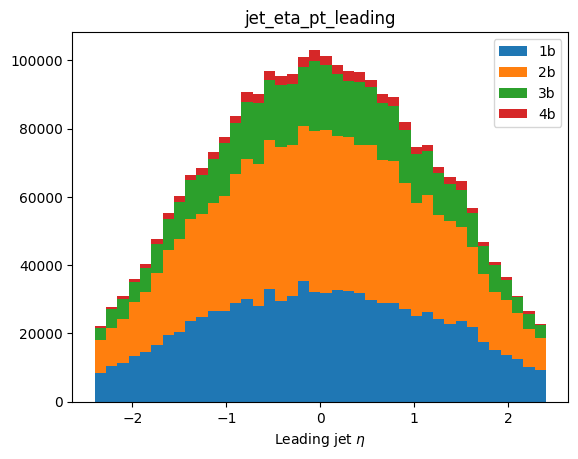

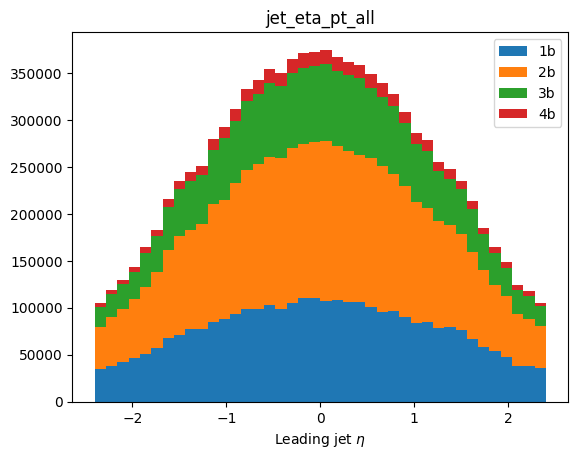

<Figure size 640x480 with 0 Axes>

In [7]:
filename = "output_TTbbDiLeptonic_Powheg_2018.coffea"
o = load(filename)
print(o['variables']['nMuonGood']['TTbbDiLeptonic'].keys())
for i, var_name in enumerate(o['variables'].keys()):
    varHist = o['variables'][var_name]['TTbbDiLeptonic']['TTbbDiLeptonic_Powheg_2018']
    h = varHist.stack("cat").project(varHist.axes[-1].name)[:-1].plot(stack=True,density=False,histtype="fill")
    plt.legend()
    plt.title(var_name)
    plt.savefig(f"hists/plot_{i}.png")
    plt.show()
    plt.clf()